___
# Wine
___

In [1]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names

--2020-09-04 10:50:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.1s    

2020-09-04 10:50:28 (615 KB/s) - ‘winequality-red.csv’ saved [84199/84199]

--2020-09-04 10:50:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3305 (3.2K) [application/x-httpd-php]
Saving to: ‘winequality.names’

winequality.names   100%[================

____
## Importing the Project Dependencies
___

In [2]:
# import project dependencies

# processing libraries
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn  as sns
from mpl_toolkits.mplot3d import Axes3D

# mpl extras
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
plt.style.use('seaborn-dark')


# math n statistic library
from scipy import stats

# to read matplotlib inline
%matplotlib inline

# for string operatoions
import re

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


___
## Information about the dataset
___

* The dataset `winequality-red` contains 1 short to 1.6K samples
* The features are the attributes of the factors which determine the quality of the wine.
* Features of the datset are :
    * Input variables (based on   physic ochemical tests):
      * 1 - fixed acidity
      * 2 - volatile acidity
      * 3 - citric acid
      * 4 - residual sugar
      * 5 - chlorides
      * 6 - free sulfur dioxide
      * 7 - total sulfur dioxide
      * 8 - density
      * 9 - pH
      * 10 - sulphates
      * 11 - alcohol
      * Output variable (based on sensory data): 
      * 12 - quality (score between 0 and 10)
* We will perform regression on the red wine dataset as this dataset can be used for both Classification as well as regression.

  

___
## Importing the dataset and making it ready for Analysis
___

In [3]:
# read in the dataframe
df = pd.read_csv('winequality-red.csv',sep=';')

In [4]:
# head of the datasframe
df.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* every features is a float datatype 
* The features is an integer values and is a discrete categorical feature

In [6]:
# description of the datset
df.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

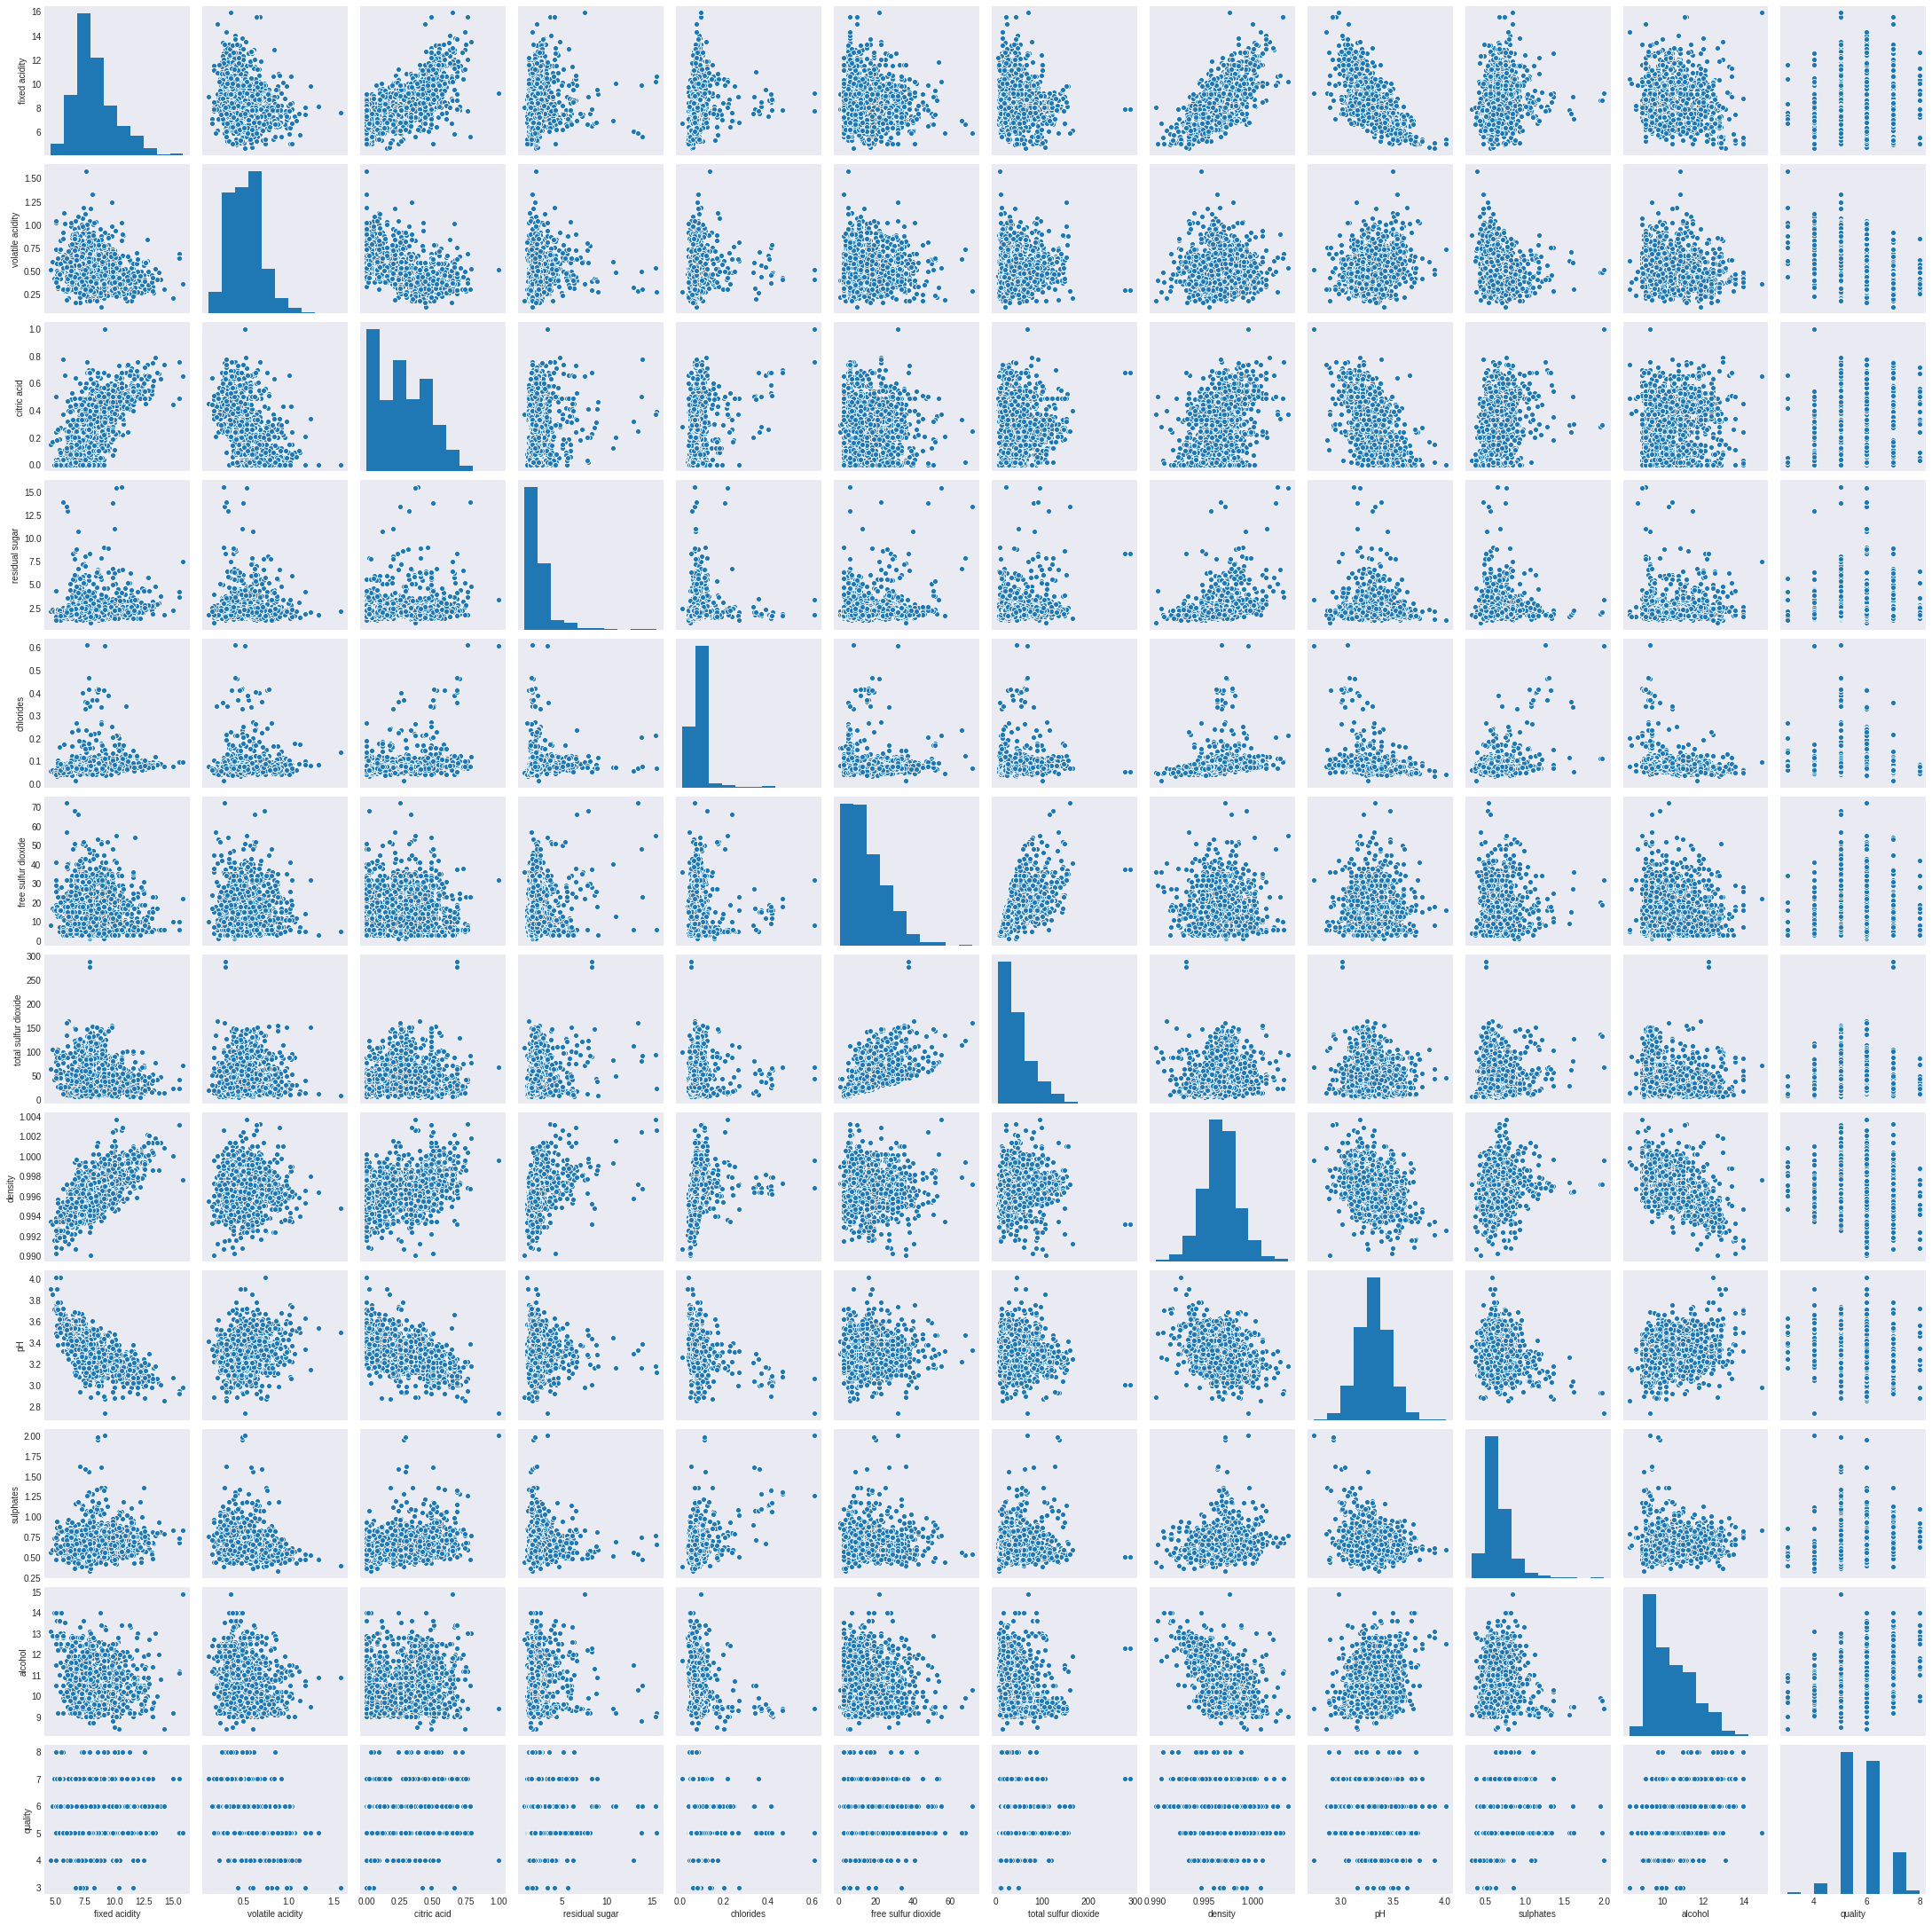

In [7]:
# pairplot 
sns.pairplot(df)

In [8]:
df.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

In [9]:
len(df.columns)

12

In [10]:
# Let's check for missing data
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

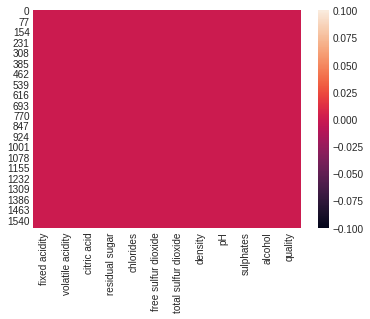

In [11]:
sns.heatmap(df.isna())

* there is no missing data in the dataset
* also as the datatype of all the feature is float,there can be no dirty values(excluding outliers)

# EDA

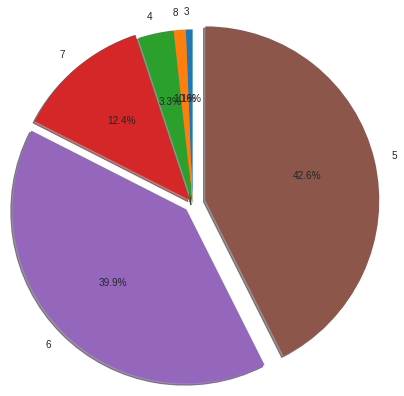

In [12]:
# A pie chart 

df_pie = df.quality.value_counts().reset_index()
df_pie = df_pie.sort_values(by='quality')

quality_count = list(df_pie.iloc[:,1])
quality_labels = list(df_pie.iloc[:,0])

plt.pie(quality_count,labels=quality_labels,radius=2,autopct='%0.1f%%',shadow=True,startangle=90,explode=[0,0,0,0.05,0.1,0.15],);

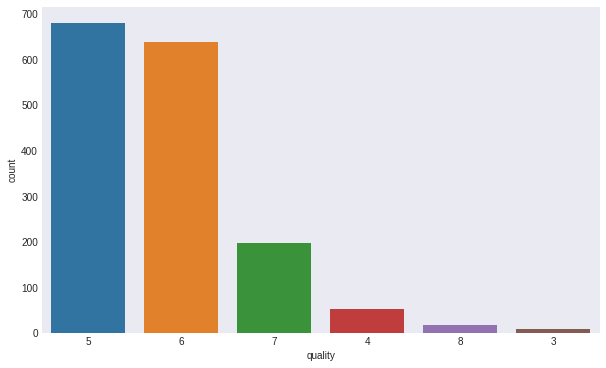

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(df.quality,palette='tab10',order=df.quality.value_counts().index)

* The dataset is pretty biased

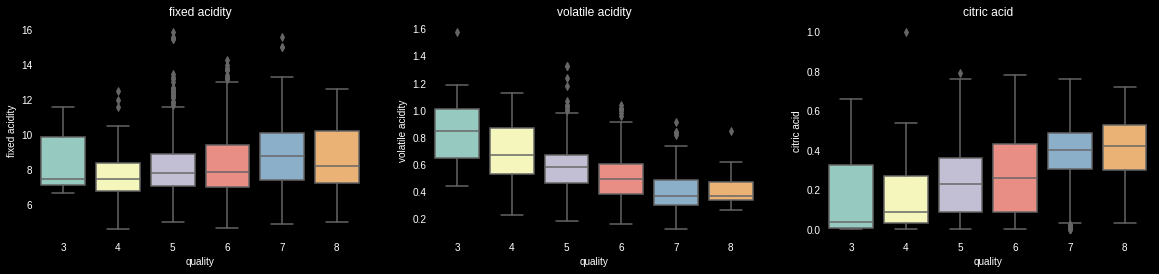

<Figure size 432x288 with 0 Axes>

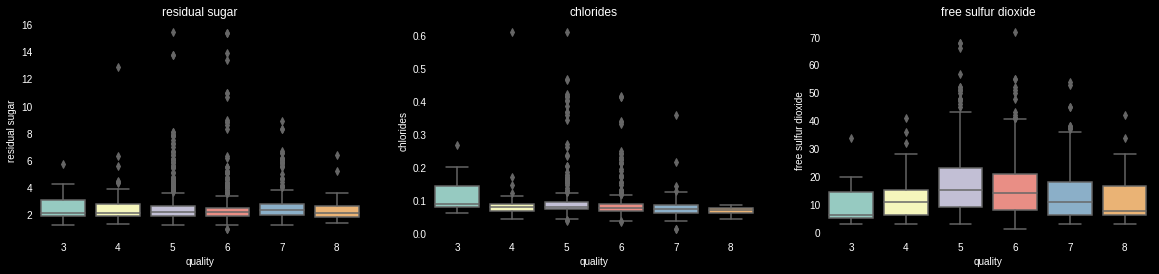

<Figure size 432x288 with 0 Axes>

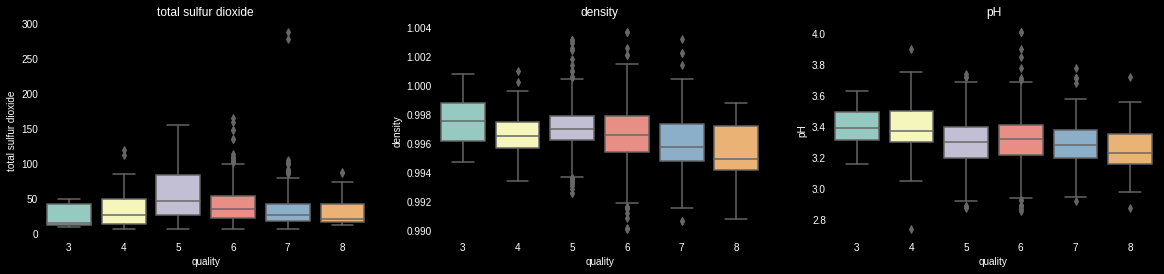

<Figure size 432x288 with 0 Axes>

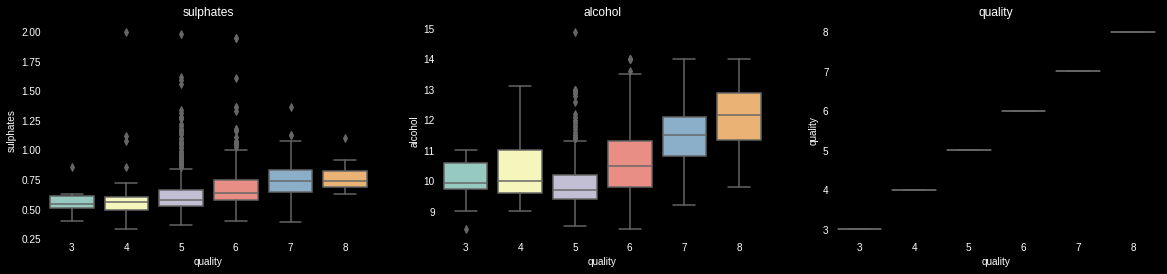

<Figure size 432x288 with 0 Axes>

In [14]:
# a figure of all the box plots in the datset.

plt.style.use('dark_background')
column=0
for col in range(int(len(df.columns)/3)):

  
  fig = plt.figure(figsize=(20,4))

  fig.add_subplot(131)
  sns.boxplot(df.quality,df.iloc[:,column])
  plt.title(df.columns[column])
  
  fig.add_subplot(132)
  sns.boxplot(df.quality,df.iloc[:,column+1])
  plt.title(df.columns[column+1])

  fig.add_subplot(133)
  sns.boxplot(df.quality,df.iloc[:,column+2])
  plt.title(df.columns[column+2])

  plt.show()
  plt.tight_layout(h_pad=6)

  column += 3
  



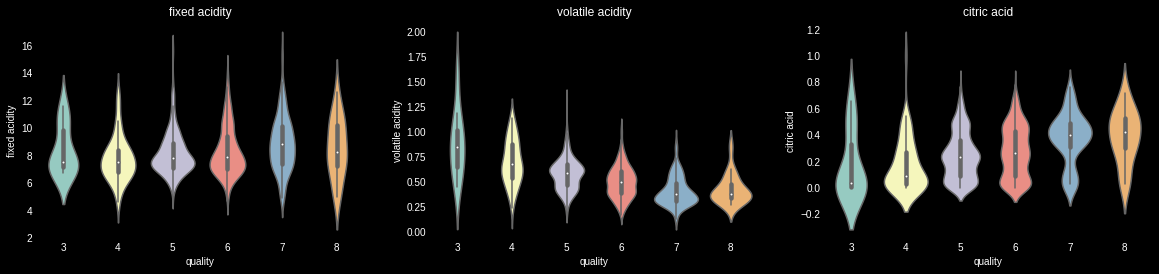

<Figure size 432x288 with 0 Axes>

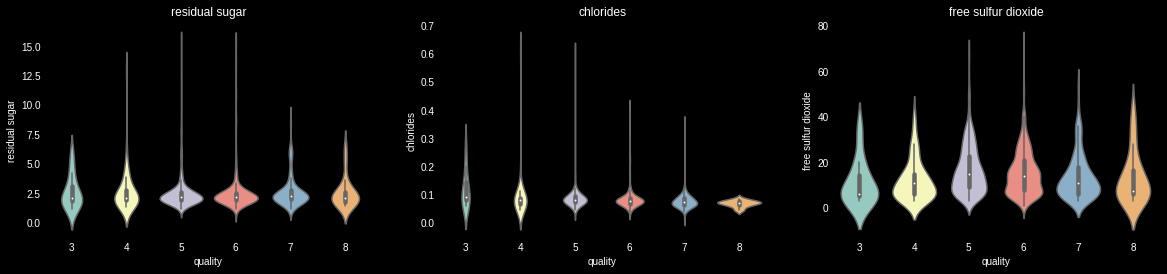

<Figure size 432x288 with 0 Axes>

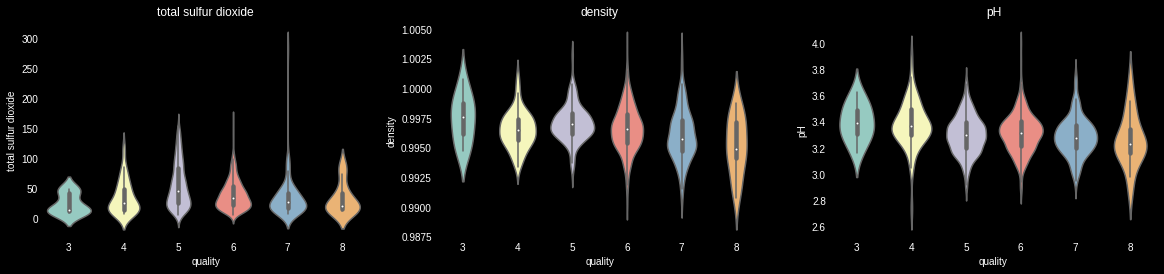

<Figure size 432x288 with 0 Axes>

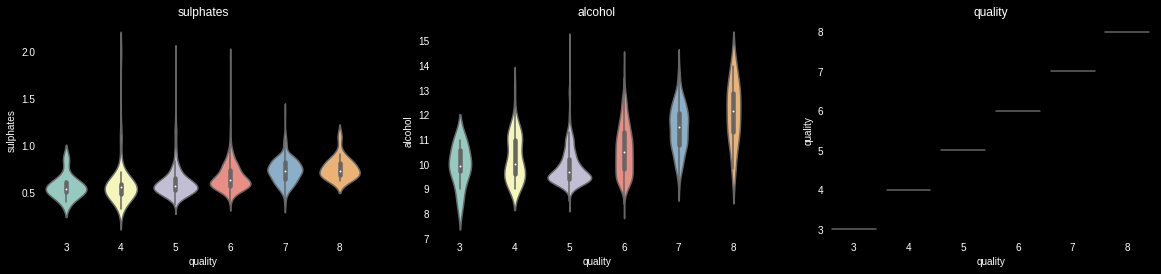

<Figure size 432x288 with 0 Axes>

In [15]:
# A Violin plot

column=0
for col in range(int(len(df.columns)/3)):

  
  fig = plt.figure(figsize=(20,4))

  fig.add_subplot(131)
  sns.violinplot(df.quality,df.iloc[:,column])
  plt.title(df.columns[column])
  
  fig.add_subplot(132)
  sns.violinplot(df.quality,df.iloc[:,column+1])
  plt.title(df.columns[column+1])

  fig.add_subplot(133)
  sns.violinplot(df.quality,df.iloc[:,column+2])
  plt.title(df.columns[column+2])

  plt.show()
  plt.tight_layout(h_pad=6)

  column += 3

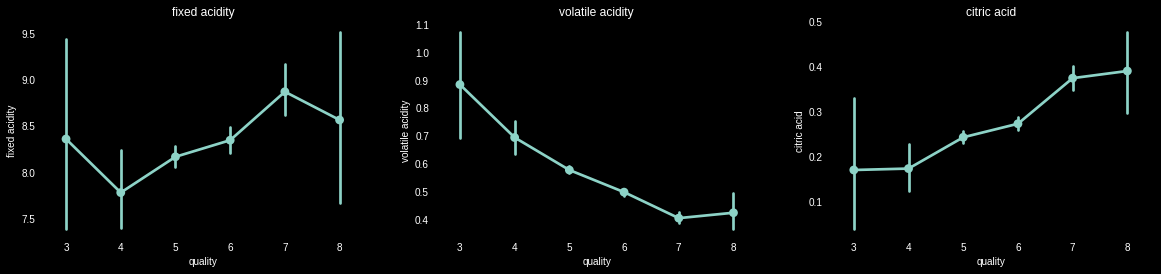

<Figure size 432x288 with 0 Axes>

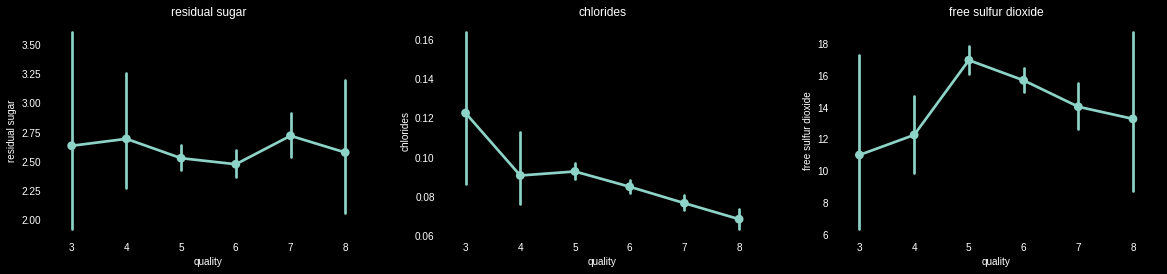

<Figure size 432x288 with 0 Axes>

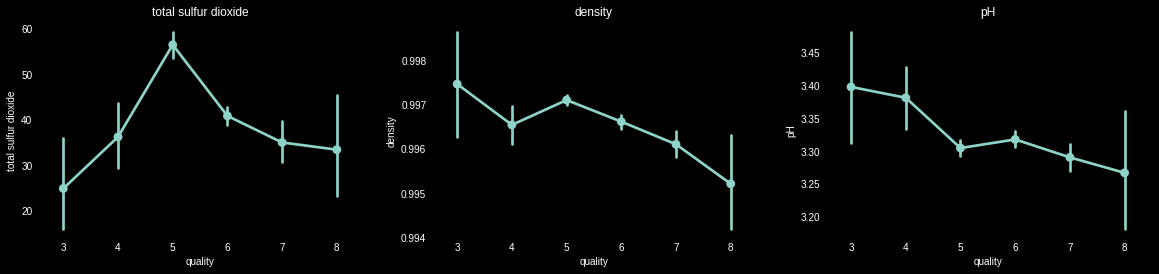

<Figure size 432x288 with 0 Axes>

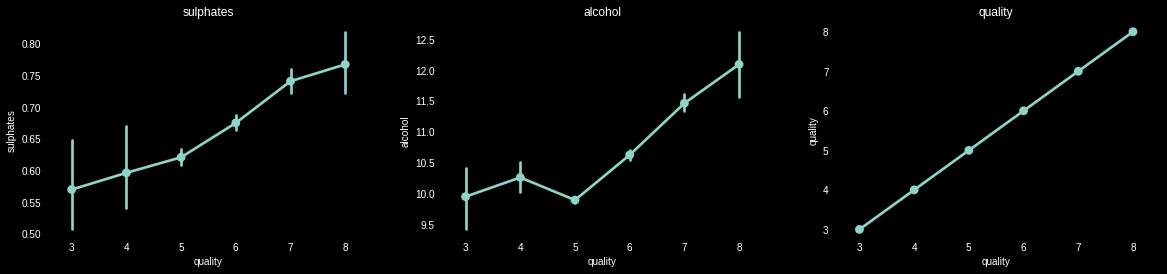

<Figure size 432x288 with 0 Axes>

In [16]:
# A point plot

column=0
for col in range(int(len(df.columns)/3)):

  
  fig = plt.figure(figsize=(20,4))

  fig.add_subplot(131)
  sns.pointplot(df.quality,df.iloc[:,column])
  plt.title(df.columns[column])
  
  fig.add_subplot(132)
  sns.pointplot(df.quality,df.iloc[:,column+1])
  plt.title(df.columns[column+1])

  fig.add_subplot(133)
  sns.pointplot(df.quality,df.iloc[:,column+2])
  plt.title(df.columns[column+2])

  plt.show()
  plt.tight_layout(h_pad=6)

  column += 3

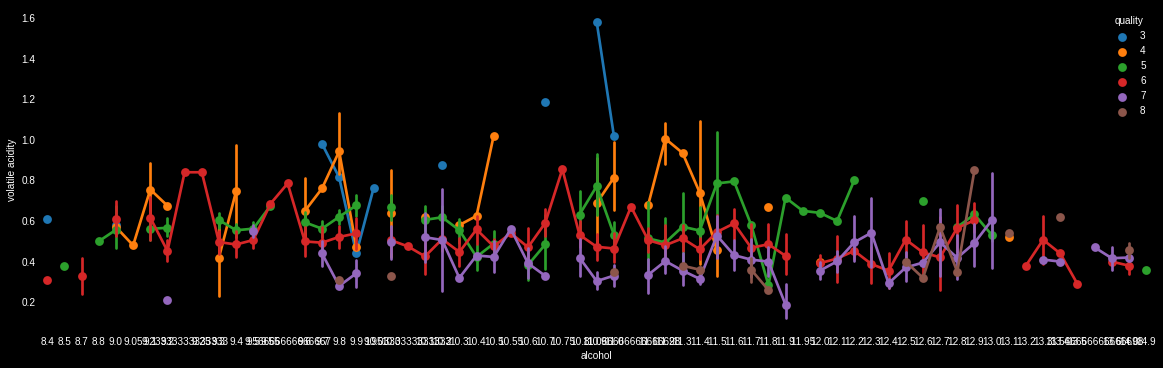

In [17]:
fig = plt.figure(figsize = (20,6))
sns.pointplot(x='alcohol',y='volatile acidity',hue='quality',data=df,palette='tab10')

In [18]:
df.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

* The pH value decrease as the residual sugar in the wine

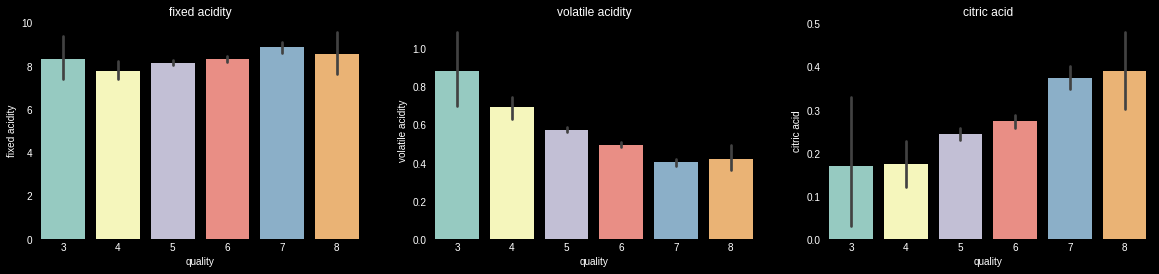

<Figure size 432x288 with 0 Axes>

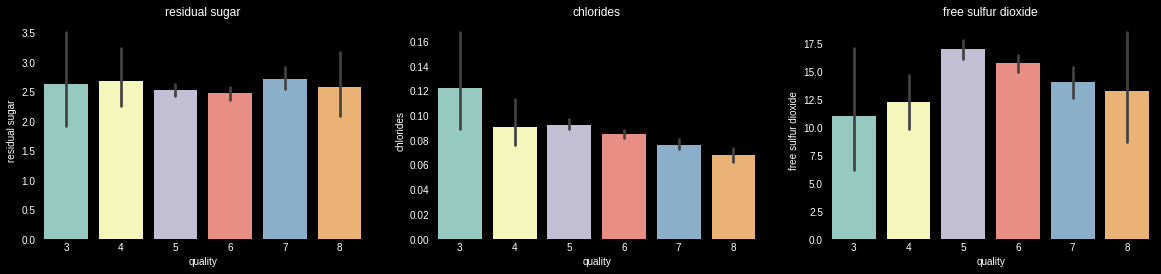

<Figure size 432x288 with 0 Axes>

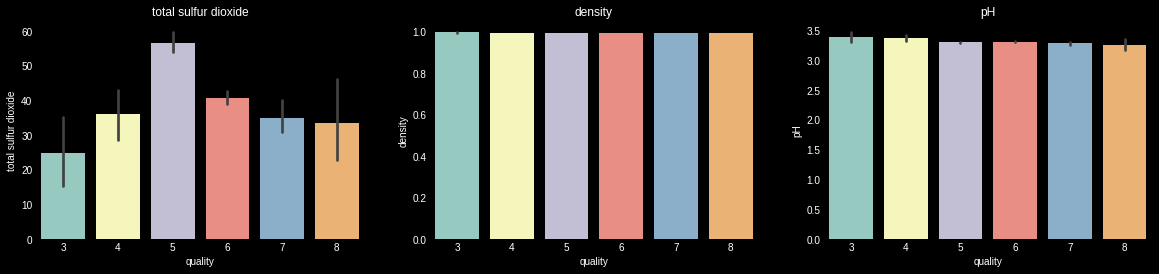

<Figure size 432x288 with 0 Axes>

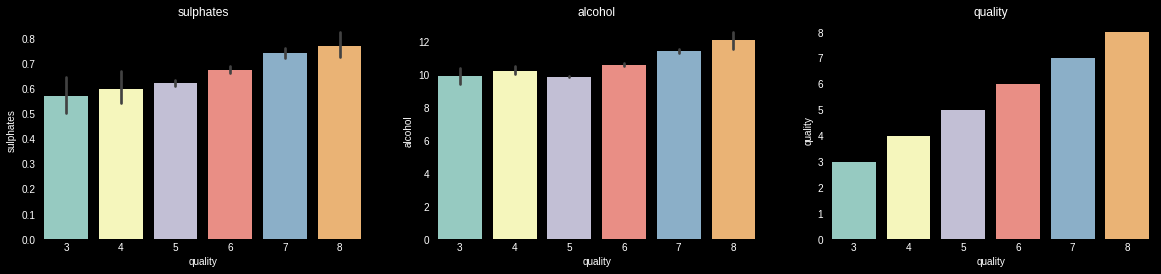

<Figure size 432x288 with 0 Axes>

In [19]:
# count plots to check the uniformity of the features

column=0
for col in range(int(len(df.columns)/3)):

  
  fig = plt.figure(figsize=(20,4))

  fig.add_subplot(131)
  sns.barplot(df.quality,df.iloc[:,column])
  plt.title(df.columns[column])
  
  fig.add_subplot(132)
  sns.barplot(df.quality,df.iloc[:,column+1])
  plt.title(df.columns[column+1])

  fig.add_subplot(133)
  sns.barplot(df.quality,df.iloc[:,column+2])
  plt.title(df.columns[column+2])

  plt.show()
  plt.tight_layout(h_pad=6)

  column += 3

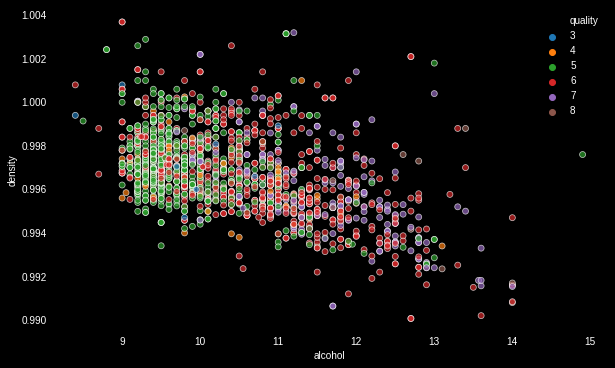

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['alcohol'],df['density'],hue=df.quality,palette='tab10',alpha=0.7)

In [21]:
df.alcohol

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64

In [22]:
df['density'].round(2)

0       1.00
1       1.00
2       1.00
3       1.00
4       1.00
        ... 
1594    0.99
1595    1.00
1596    1.00
1597    1.00
1598    1.00
Name: density, Length: 1599, dtype: float64

In [23]:
# correlation of the features

df.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

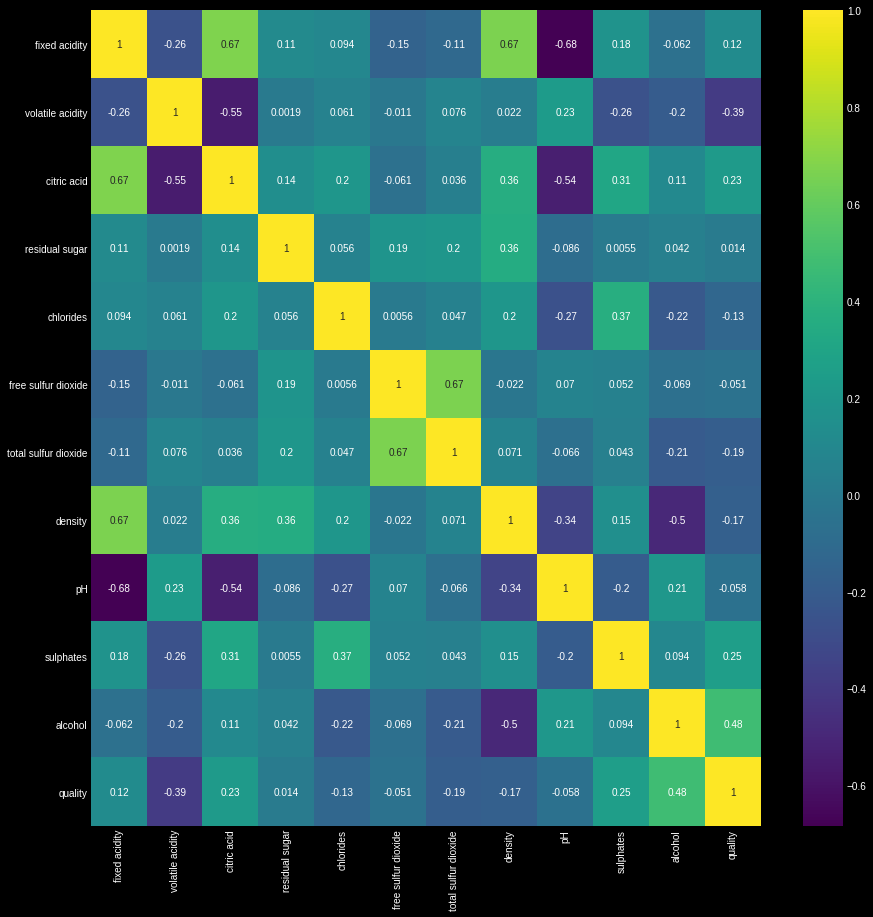

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

* As expectedthe target variable `quality` has a good correlation with the `volatile acidity` and `alcohol` features

### Inference:
  * 1. The higher the quality of the wine ,the lower the volatile acidity.
  This mean the wines with high quality undergo very less dilution
  * 2. There is relatively bit more average sugar in the cheapest wine. 
  * 3. Most of the sulhur dioxide is found in the wines of average quality and  as they have more sulfur-dioxide they have to trade it of with alcohol content
  * 4. The best quality wines have the highest concentration of alcohol.
  * 5. Most of the wines in this dataset are of average quality
  * 6. Wines very high to very less in the dataset 
  * 7. Most of the attributers are uniform in all the wines

### Processing outliers in the datset

#### Using Z-score

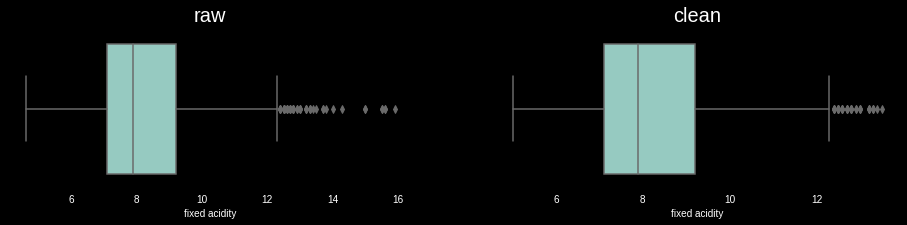

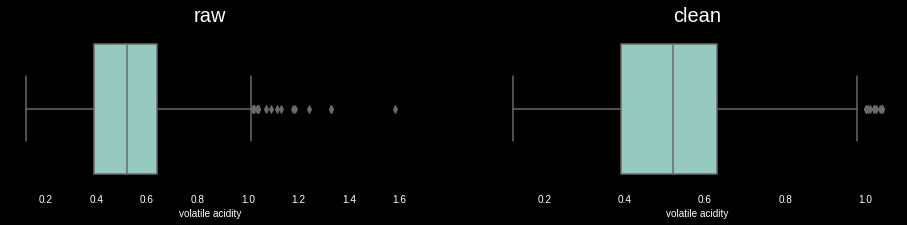

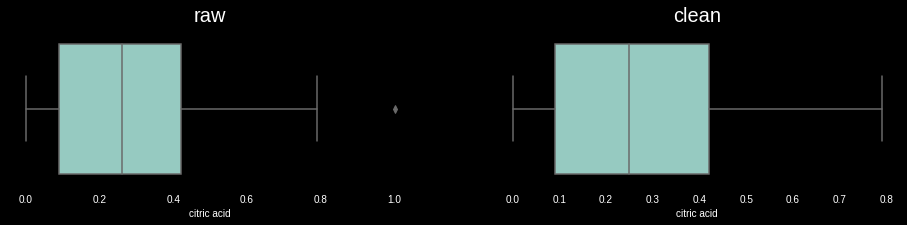

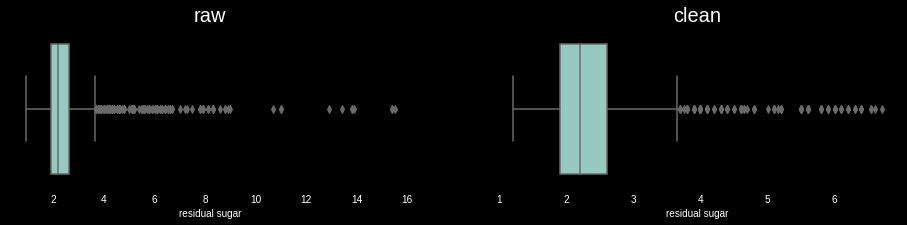

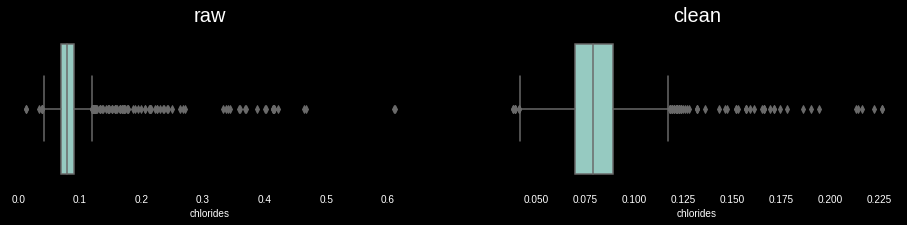

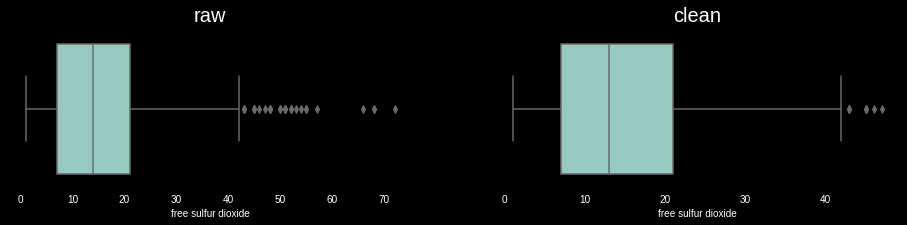

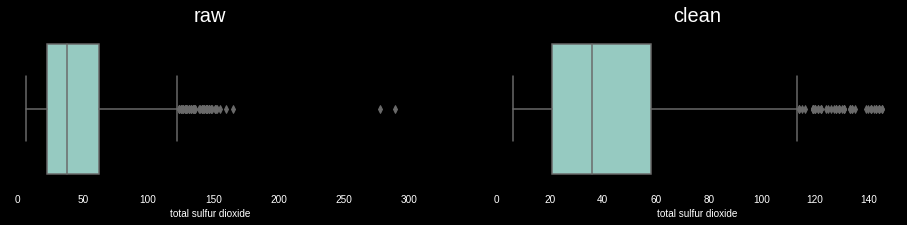

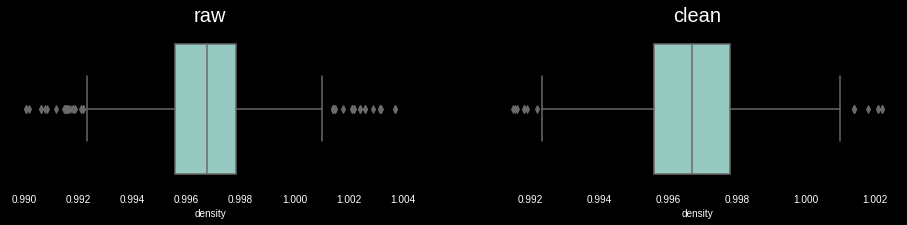

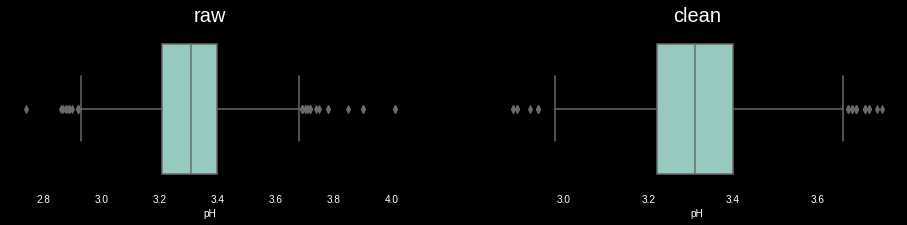

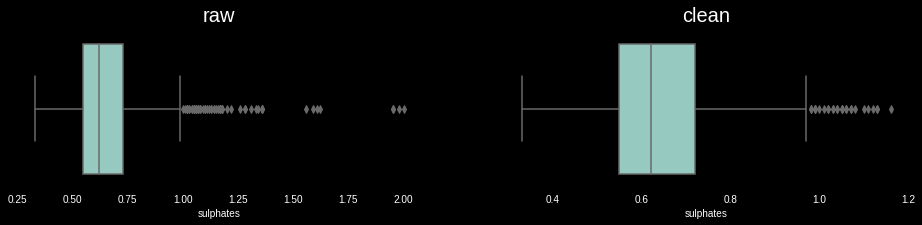

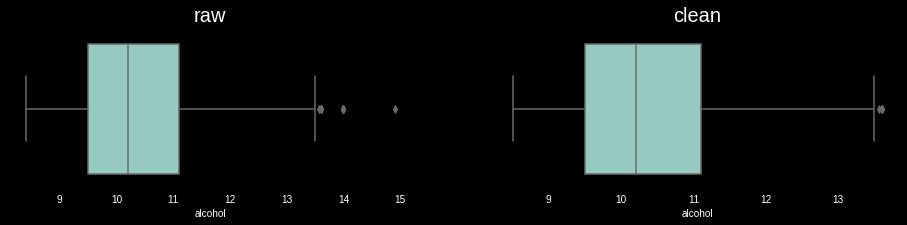

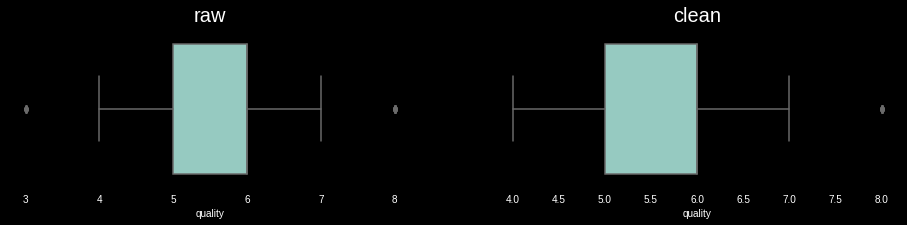

In [25]:
# let's find out the outliers using the dataset  using the z_score

z_scores = stats.zscore(df)  # calculate the z_score of the dataframe


abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_cleaned_z = df[filtered_entries]

for col in df.columns:
    
    fig = plt.figure(figsize=(16,3))
    

    fig.add_subplot(121)
    plt.title('raw',fontsize=20)
    sns.boxplot(df[col])
    

    fig.add_subplot(122)
    plt.title('clean',fontsize=20)
    sns.boxplot(df_cleaned_z[col])

    plt.show()  

#### Using IQR

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


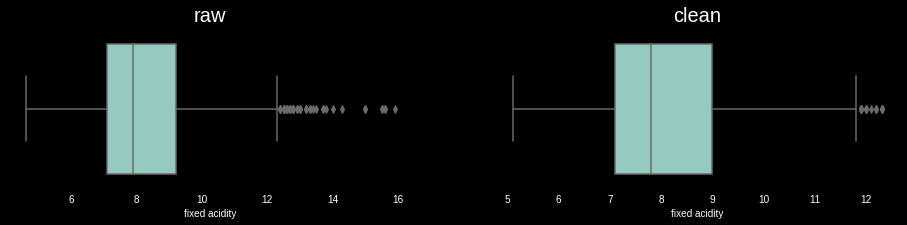

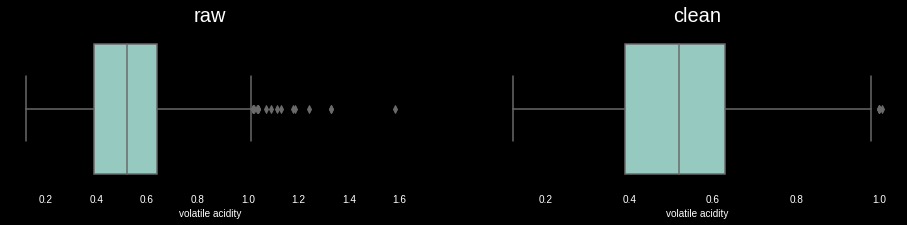

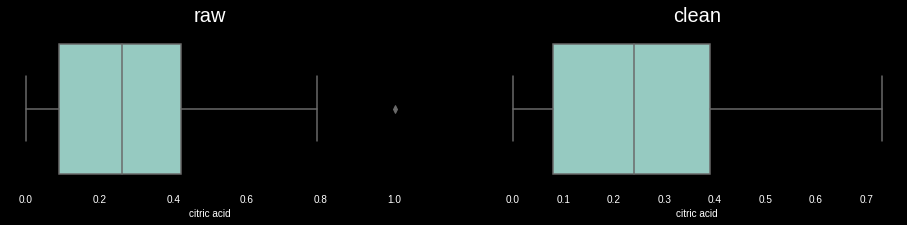

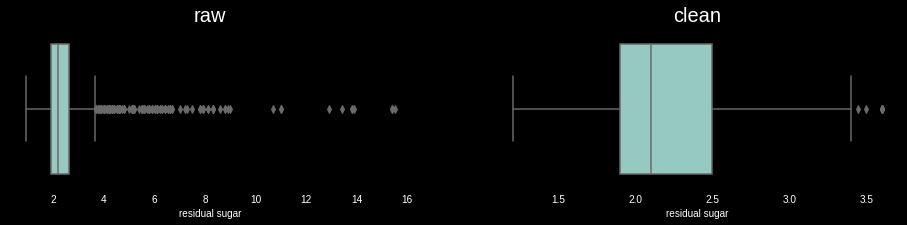

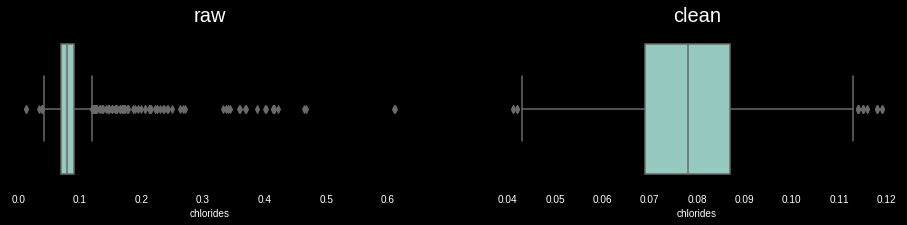

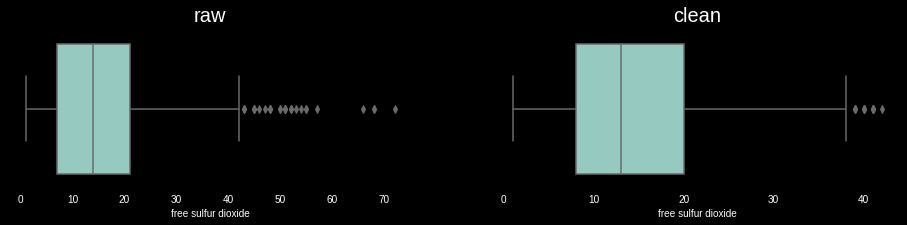

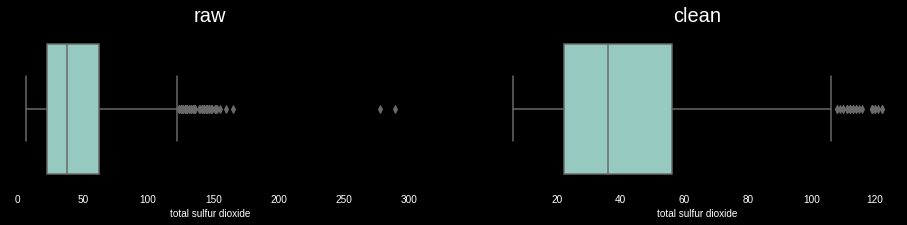

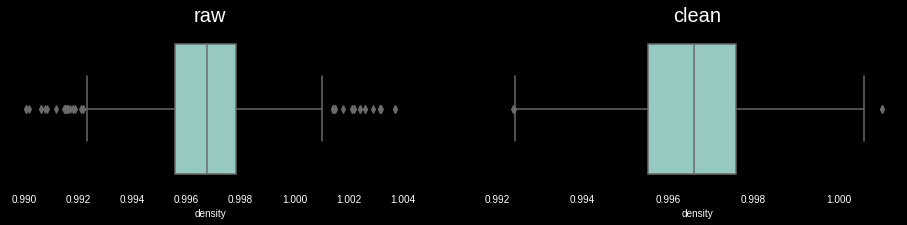

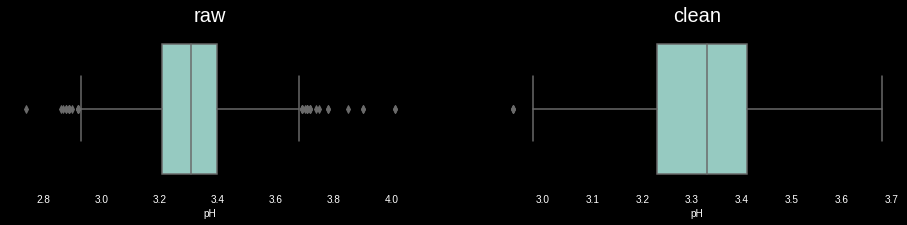

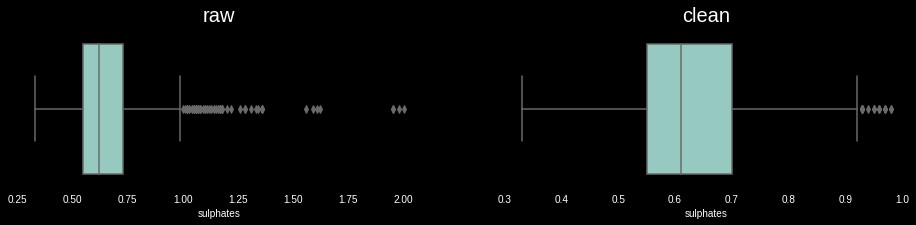

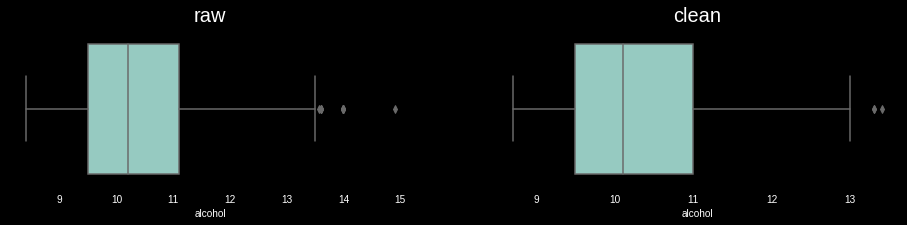

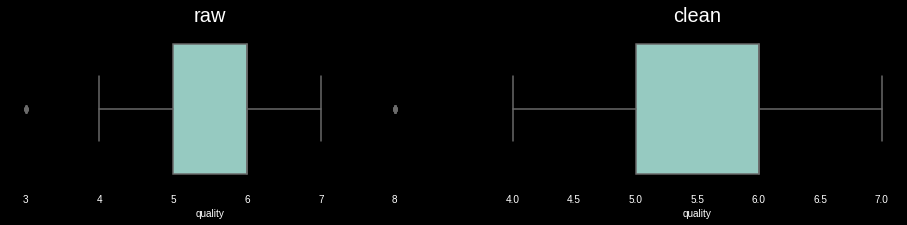

In [26]:
# finding using IQR

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_cleaned_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

for col in df.columns:
    
    fig = plt.figure(figsize=(16,3))
    

    fig.add_subplot(121)
    plt.title('raw',fontsize=20)
    sns.boxplot(df[col])
    

    fig.add_subplot(122)
    plt.title('clean',fontsize=20)
    sns.boxplot(df_cleaned_iqr[col])

    plt.show()  

#### Z-score vs IQR

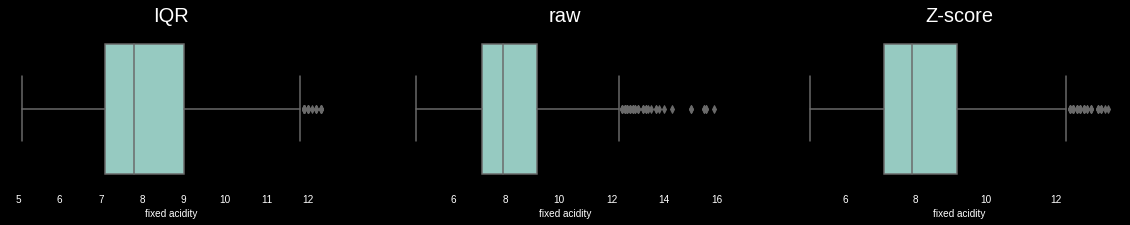

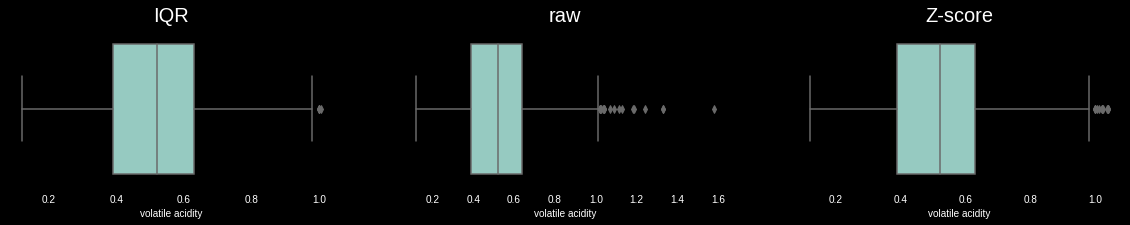

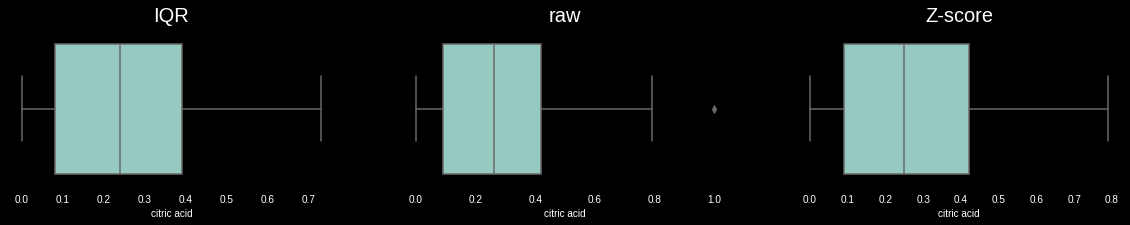

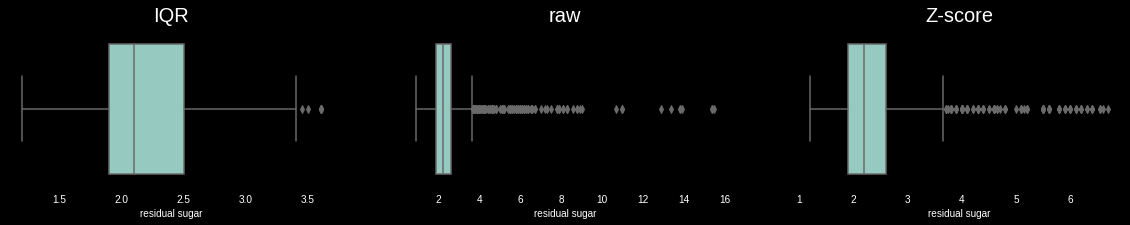

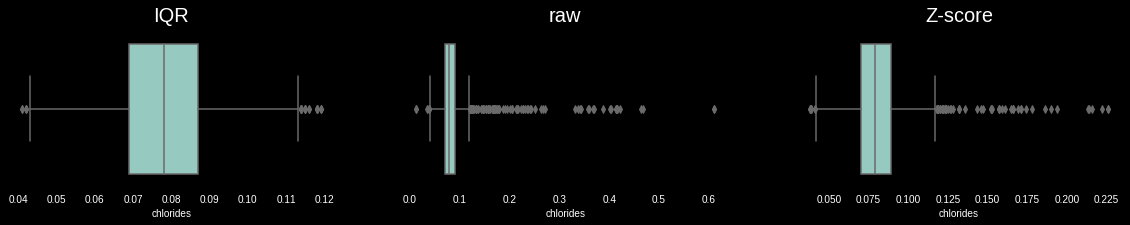

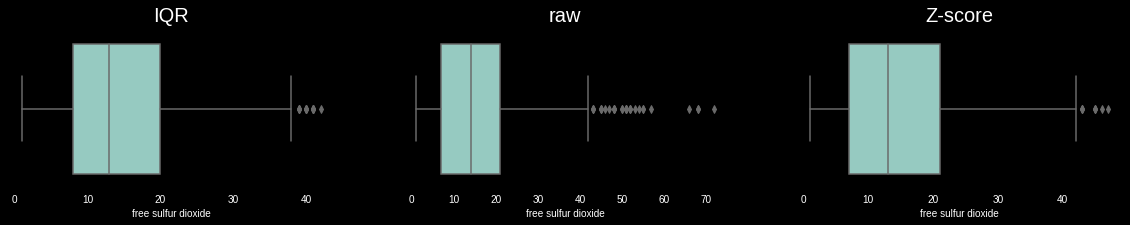

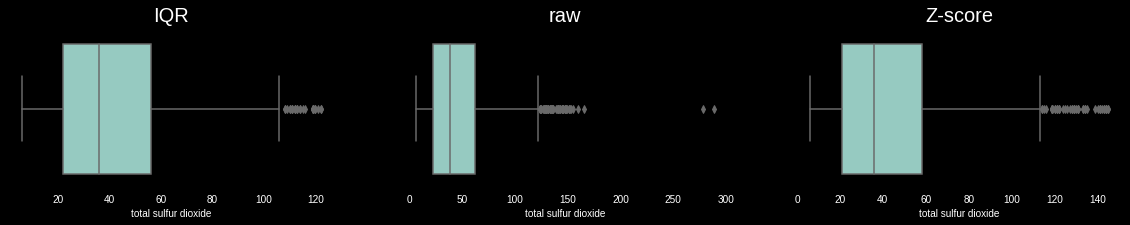

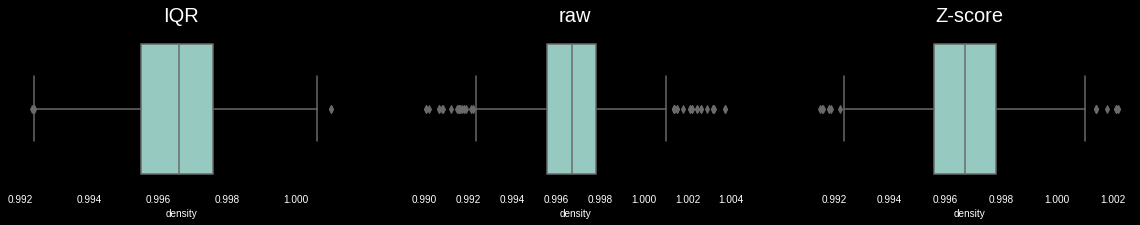

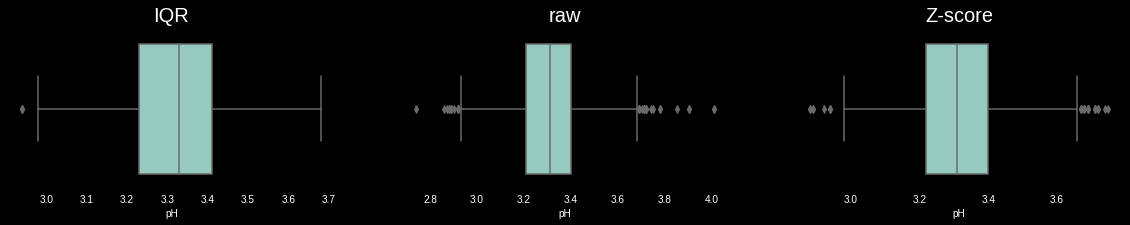

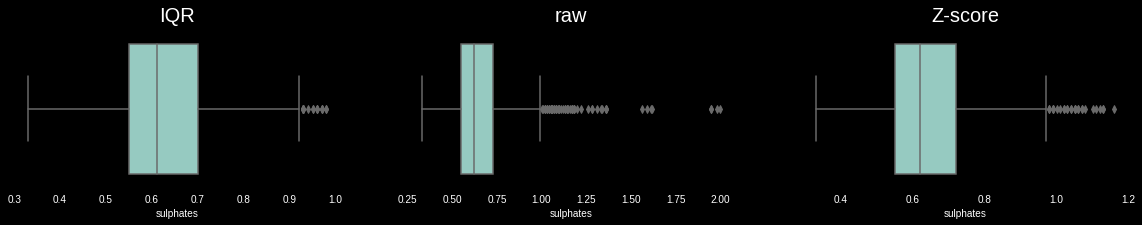

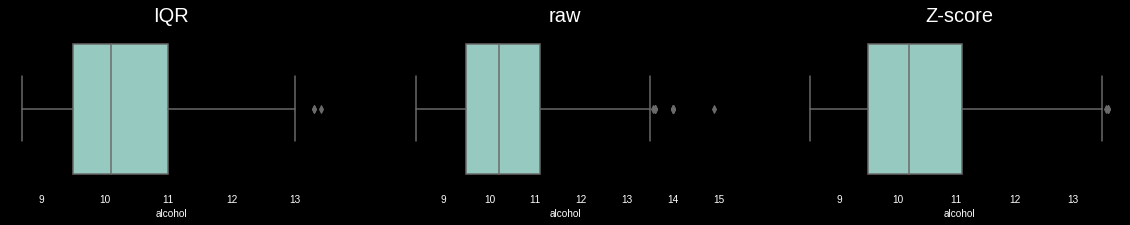

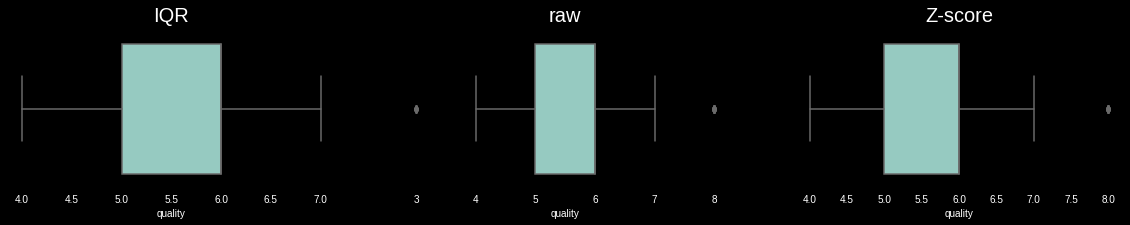

In [27]:
# comparing both the techniques with the original raw data
for col in df.columns:
    
    fig = plt.figure(figsize=(20,3))
    

    fig.add_subplot(131)
    plt.title('IQR',fontsize=20)
    sns.boxplot(df_cleaned_iqr[col])
    
    fig.add_subplot(132)
    plt.title('raw',fontsize=20)
    sns.boxplot(df[col])

    fig.add_subplot(133)
    plt.title('Z-score',fontsize=20)
    sns.boxplot(df_cleaned_z[col])
     

    
    plt.show()  

* We can see that IQR does a pretty good job of removal of the outliers

In [28]:
# Finalize the IQR dataframe

In [29]:
df_cleaned = df_cleaned_iqr.copy()

In [30]:
df_cleaned.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1179.000000       1179.000000  ...  1179.000000  1179.000000
mean        8.162002          0.523066  ...    10.350792     5.623410
std         1.458270          0.164231  ...     0.963954     0.721248
min         5.100000          0.120000  ...     8.700000     4.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.800000          0.520000  ...    10.100000     6.000000
75%         9.000000          0.630000  ...    11.000000     6.000000
max        12.300000          1.005000  ...    13.400000     7.000000

[8 rows x 12 columns]

### The skewness problem

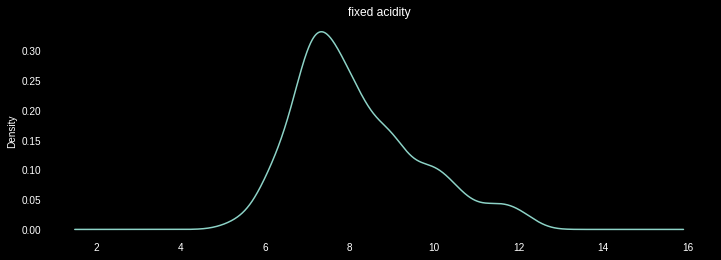

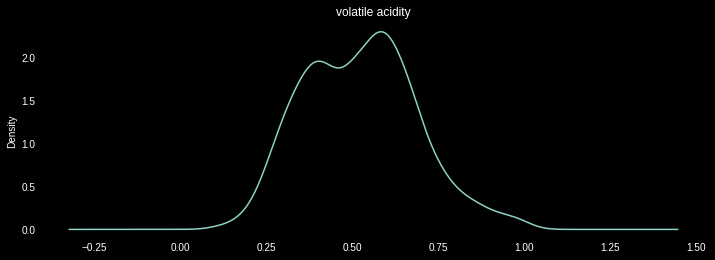

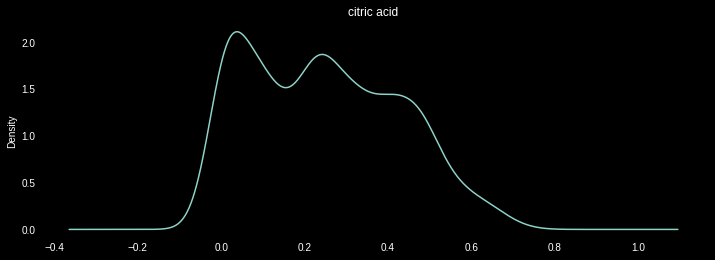

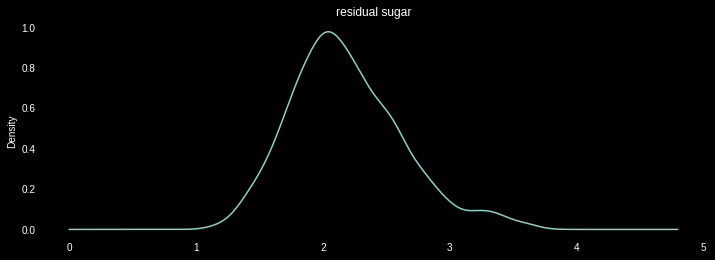

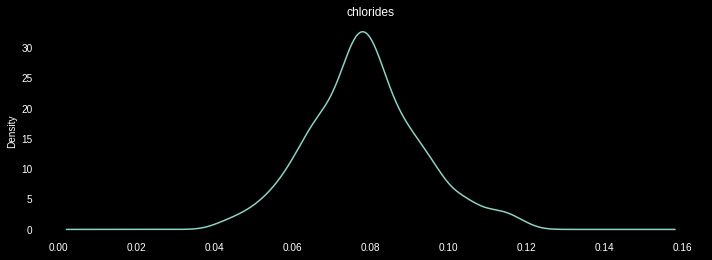

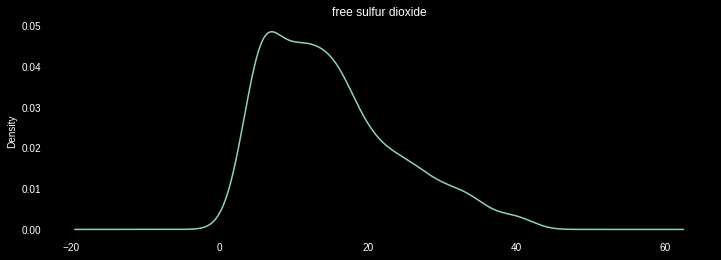

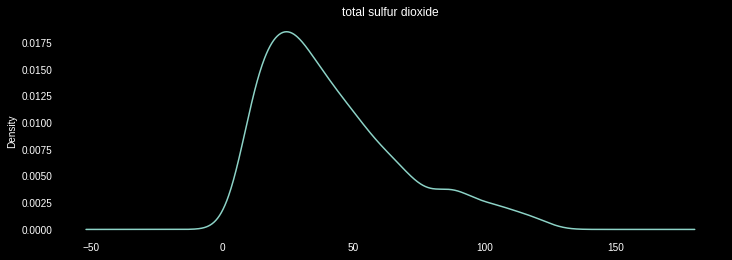

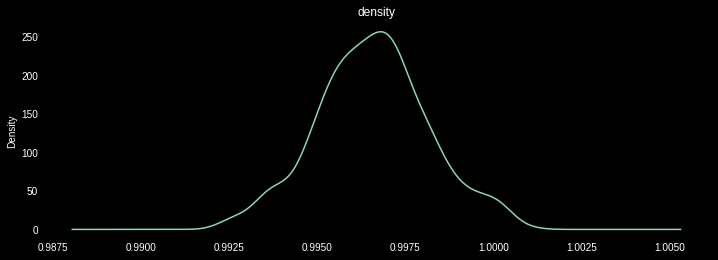

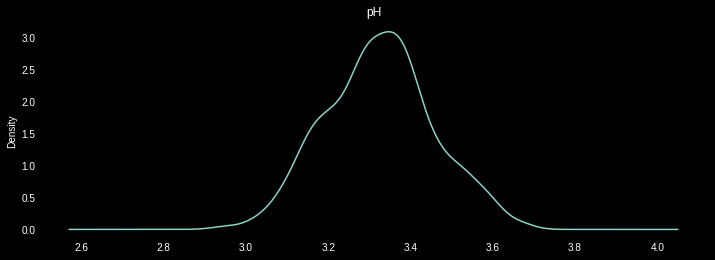

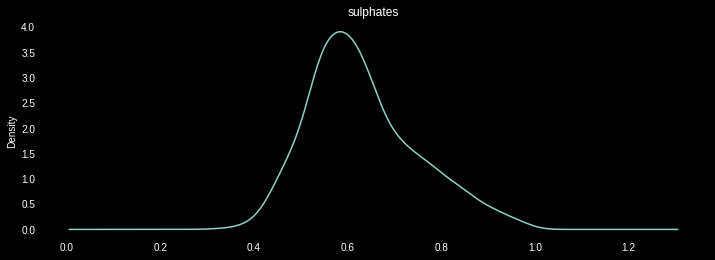

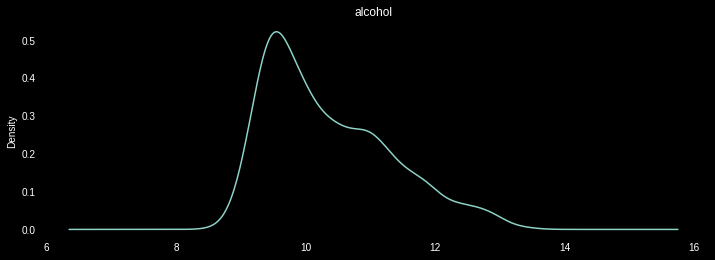

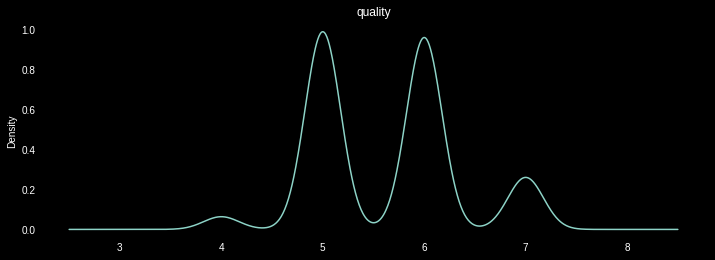

In [31]:
for col in df_cleaned.columns:

        plt.title(col)
        df_cleaned[col].plot.density(figsize=(12,4))
        plt.show()

* Some of the features are skewed

In [32]:
# skewness in values
skew_per_col = stats.skew(df)
skew_per_col = np.round(skew_per_col,2)

In [33]:
skew_per_col_df = pd.DataFrame(list(zip(df.columns,skew_per_col)),columns=['feature','skewness'])
skew_per_col_df['acceptable'] = skew_per_col_df['skewness']
skew_per_col_df['acceptable'] = skew_per_col_df['acceptable'].apply(lambda x:'Yes' if abs(x) < 1 else 'No')

In [34]:
skew_per_col_df

feature  skewness acceptable
0          fixed acidity      0.98        Yes
1       volatile acidity      0.67        Yes
2            citric acid      0.32        Yes
3         residual sugar      4.54         No
4              chlorides      5.68         No
5    free sulfur dioxide      1.25         No
6   total sulfur dioxide      1.51         No
7                density      0.07        Yes
8                     pH      0.19        Yes
9              sulphates      2.43         No
10               alcohol      0.86        Yes
11               quality      0.22        Yes

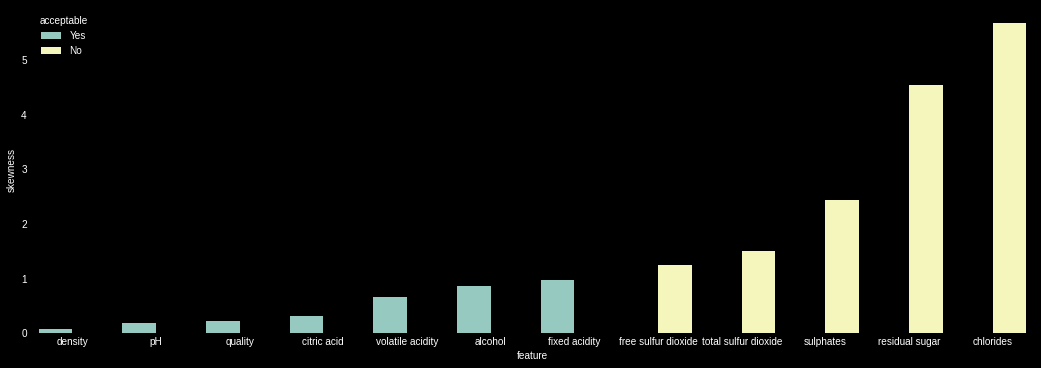

In [35]:
# plotting the skewness of the features
plt.figure(figsize=(18,6))
sns.barplot(x='feature',y='skewness',data=skew_per_col_df,order=skew_per_col_df.sort_values('skewness').iloc[:,0],hue=skew_per_col_df.acceptable)

* So the last 5 fatures in the abouve bar plot shows the unacceptably skewed data

In [36]:
# Skew Transformation using log

In [37]:
# colums to transform
skewed_cols = list(skew_per_col_df.feature.where(abs(skew_per_col_df.skewness)>1).dropna())
skewed_cols

['residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'sulphates']

In [38]:
# log transformation
df_clean_skew = df_cleaned.copy()
df_clean_skew[skewed_cols] = np.log(df_clean_skew[skewed_cols])

In [39]:
# check the skew of the transformed columns
stats.skew(df_clean_skew).reshape(-1,1)

array([[ 0.73688144],
       [ 0.26926177],
       [ 0.31117035],
       [ 0.02987533],
       [-0.3906027 ],
       [-0.34768509],
       [-0.21542911],
       [ 0.05187523],
       [ 0.06057182],
       [ 0.16595023],
       [ 0.78152439],
       [ 0.25642334]])

In [40]:
# the new values great

In [41]:
# let's plot the skew of the log transformed data

In [42]:
skew_per_col_df['|'] = '|'
skew_per_col_df['log_skewness'] = stats.skew(df_clean_skew)
skew_per_col_df['log_acceptable'] = skew_per_col_df['log_skewness']
skew_per_col_df['log_acceptable'] = skew_per_col_df['log_acceptable'].apply(lambda x:'Yes' if abs(x) < 1 else 'No')

In [43]:
skew_per_col_df

feature  skewness acceptable  |  log_skewness log_acceptable
0          fixed acidity      0.98        Yes  |      0.736881            Yes
1       volatile acidity      0.67        Yes  |      0.269262            Yes
2            citric acid      0.32        Yes  |      0.311170            Yes
3         residual sugar      4.54         No  |      0.029875            Yes
4              chlorides      5.68         No  |     -0.390603            Yes
5    free sulfur dioxide      1.25         No  |     -0.347685            Yes
6   total sulfur dioxide      1.51         No  |     -0.215429            Yes
7                density      0.07        Yes  |      0.051875            Yes
8                     pH      0.19        Yes  |      0.060572            Yes
9              sulphates      2.43         No  |      0.165950            Yes
10               alcohol      0.86        Yes  |      0.781524            Yes
11               quality      0.22        Yes  |      0.256423            Yes

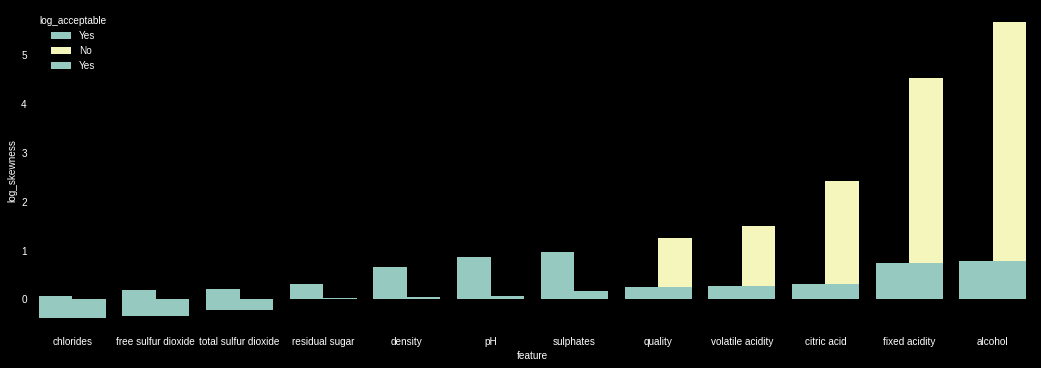

In [44]:
# plotting the skewness of the features

plt.figure(figsize=(18,6))
bar1 = sns.barplot(x='feature',y='skewness',data=skew_per_col_df,order=skew_per_col_df.sort_values('skewness').iloc[:,0],hue=skew_per_col_df.acceptable)

sns.barplot(x='feature',y='log_skewness',data=skew_per_col_df,order=skew_per_col_df.sort_values('log_skewness').iloc[:,0],hue=skew_per_col_df.log_acceptable)


In [45]:
skew_per_col_df.sort_values('skewness')

feature  skewness acceptable  |  log_skewness log_acceptable
7                density      0.07        Yes  |      0.051875            Yes
8                     pH      0.19        Yes  |      0.060572            Yes
11               quality      0.22        Yes  |      0.256423            Yes
2            citric acid      0.32        Yes  |      0.311170            Yes
1       volatile acidity      0.67        Yes  |      0.269262            Yes
10               alcohol      0.86        Yes  |      0.781524            Yes
0          fixed acidity      0.98        Yes  |      0.736881            Yes
5    free sulfur dioxide      1.25         No  |     -0.347685            Yes
6   total sulfur dioxide      1.51         No  |     -0.215429            Yes
9              sulphates      2.43         No  |      0.165950            Yes
3         residual sugar      4.54         No  |      0.029875            Yes
4              chlorides      5.68         No  |     -0.390603            Yes

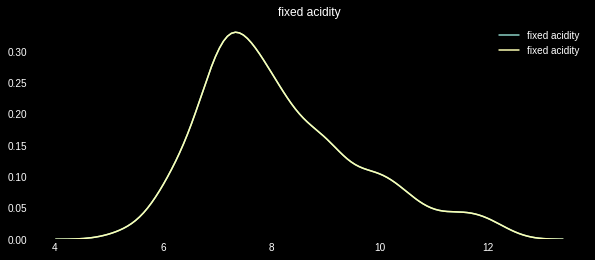

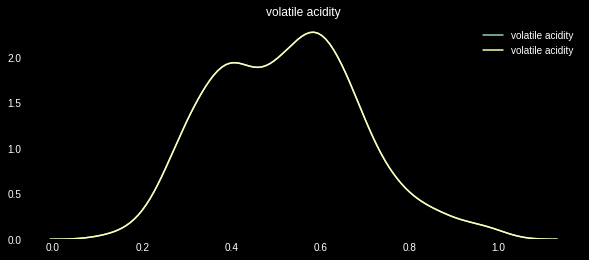

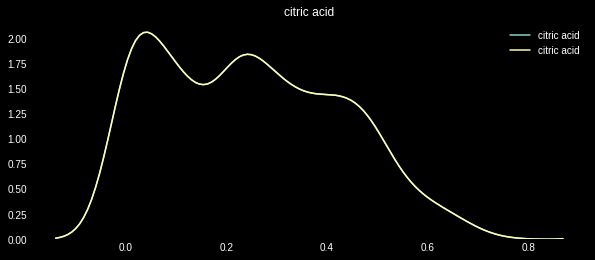

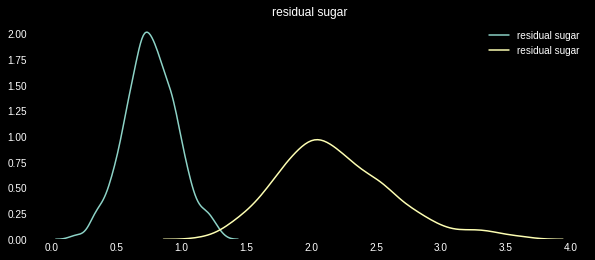

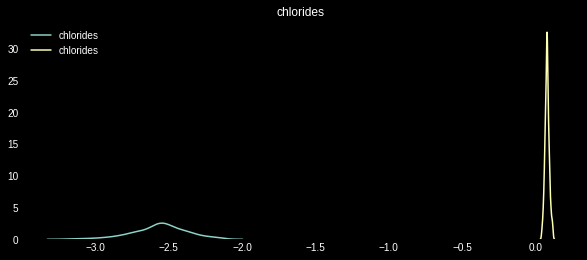

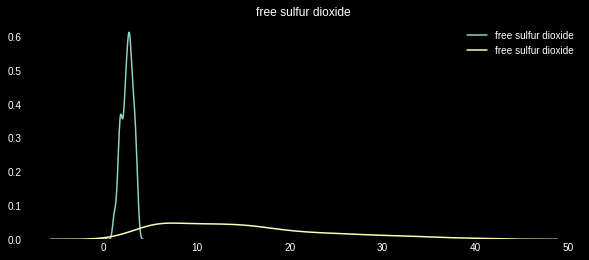

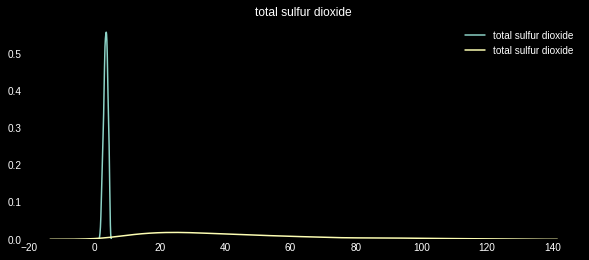

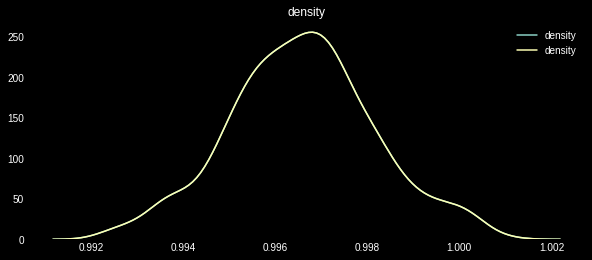

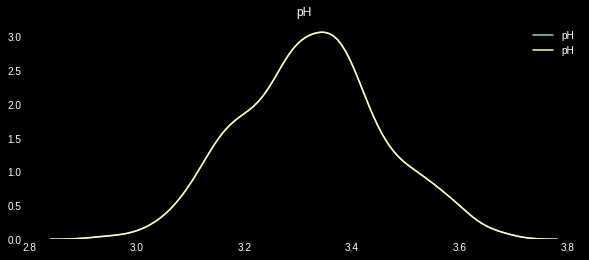

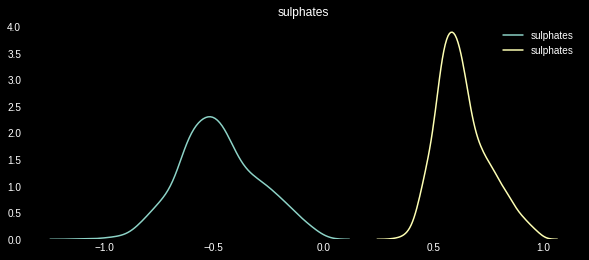

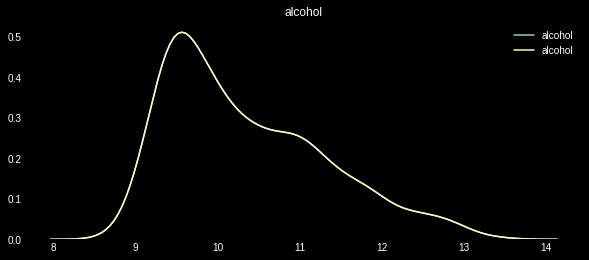

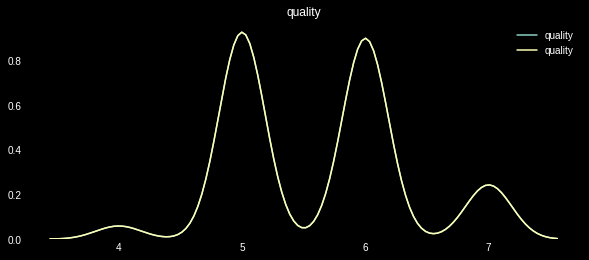

In [46]:
for col in df_clean_skew:

        plt.figure(figsize=(10,4))
        plt.title(col)
        sns.kdeplot(df_clean_skew[col])
        sns.kdeplot(df_cleaned[col])
        plt.show()

* So we can see that the skewness is reducred by applying log transformation to the skewed features

In [47]:
# Let's make the transormed features final
df_cleaned = df_clean_skew

In [48]:
# sanity check!
stats.skew(df_cleaned).reshape(-1,1)

array([[ 0.73688144],
       [ 0.26926177],
       [ 0.31117035],
       [ 0.02987533],
       [-0.3906027 ],
       [-0.34768509],
       [-0.21542911],
       [ 0.05187523],
       [ 0.06057182],
       [ 0.16595023],
       [ 0.78152439],
       [ 0.25642334]])

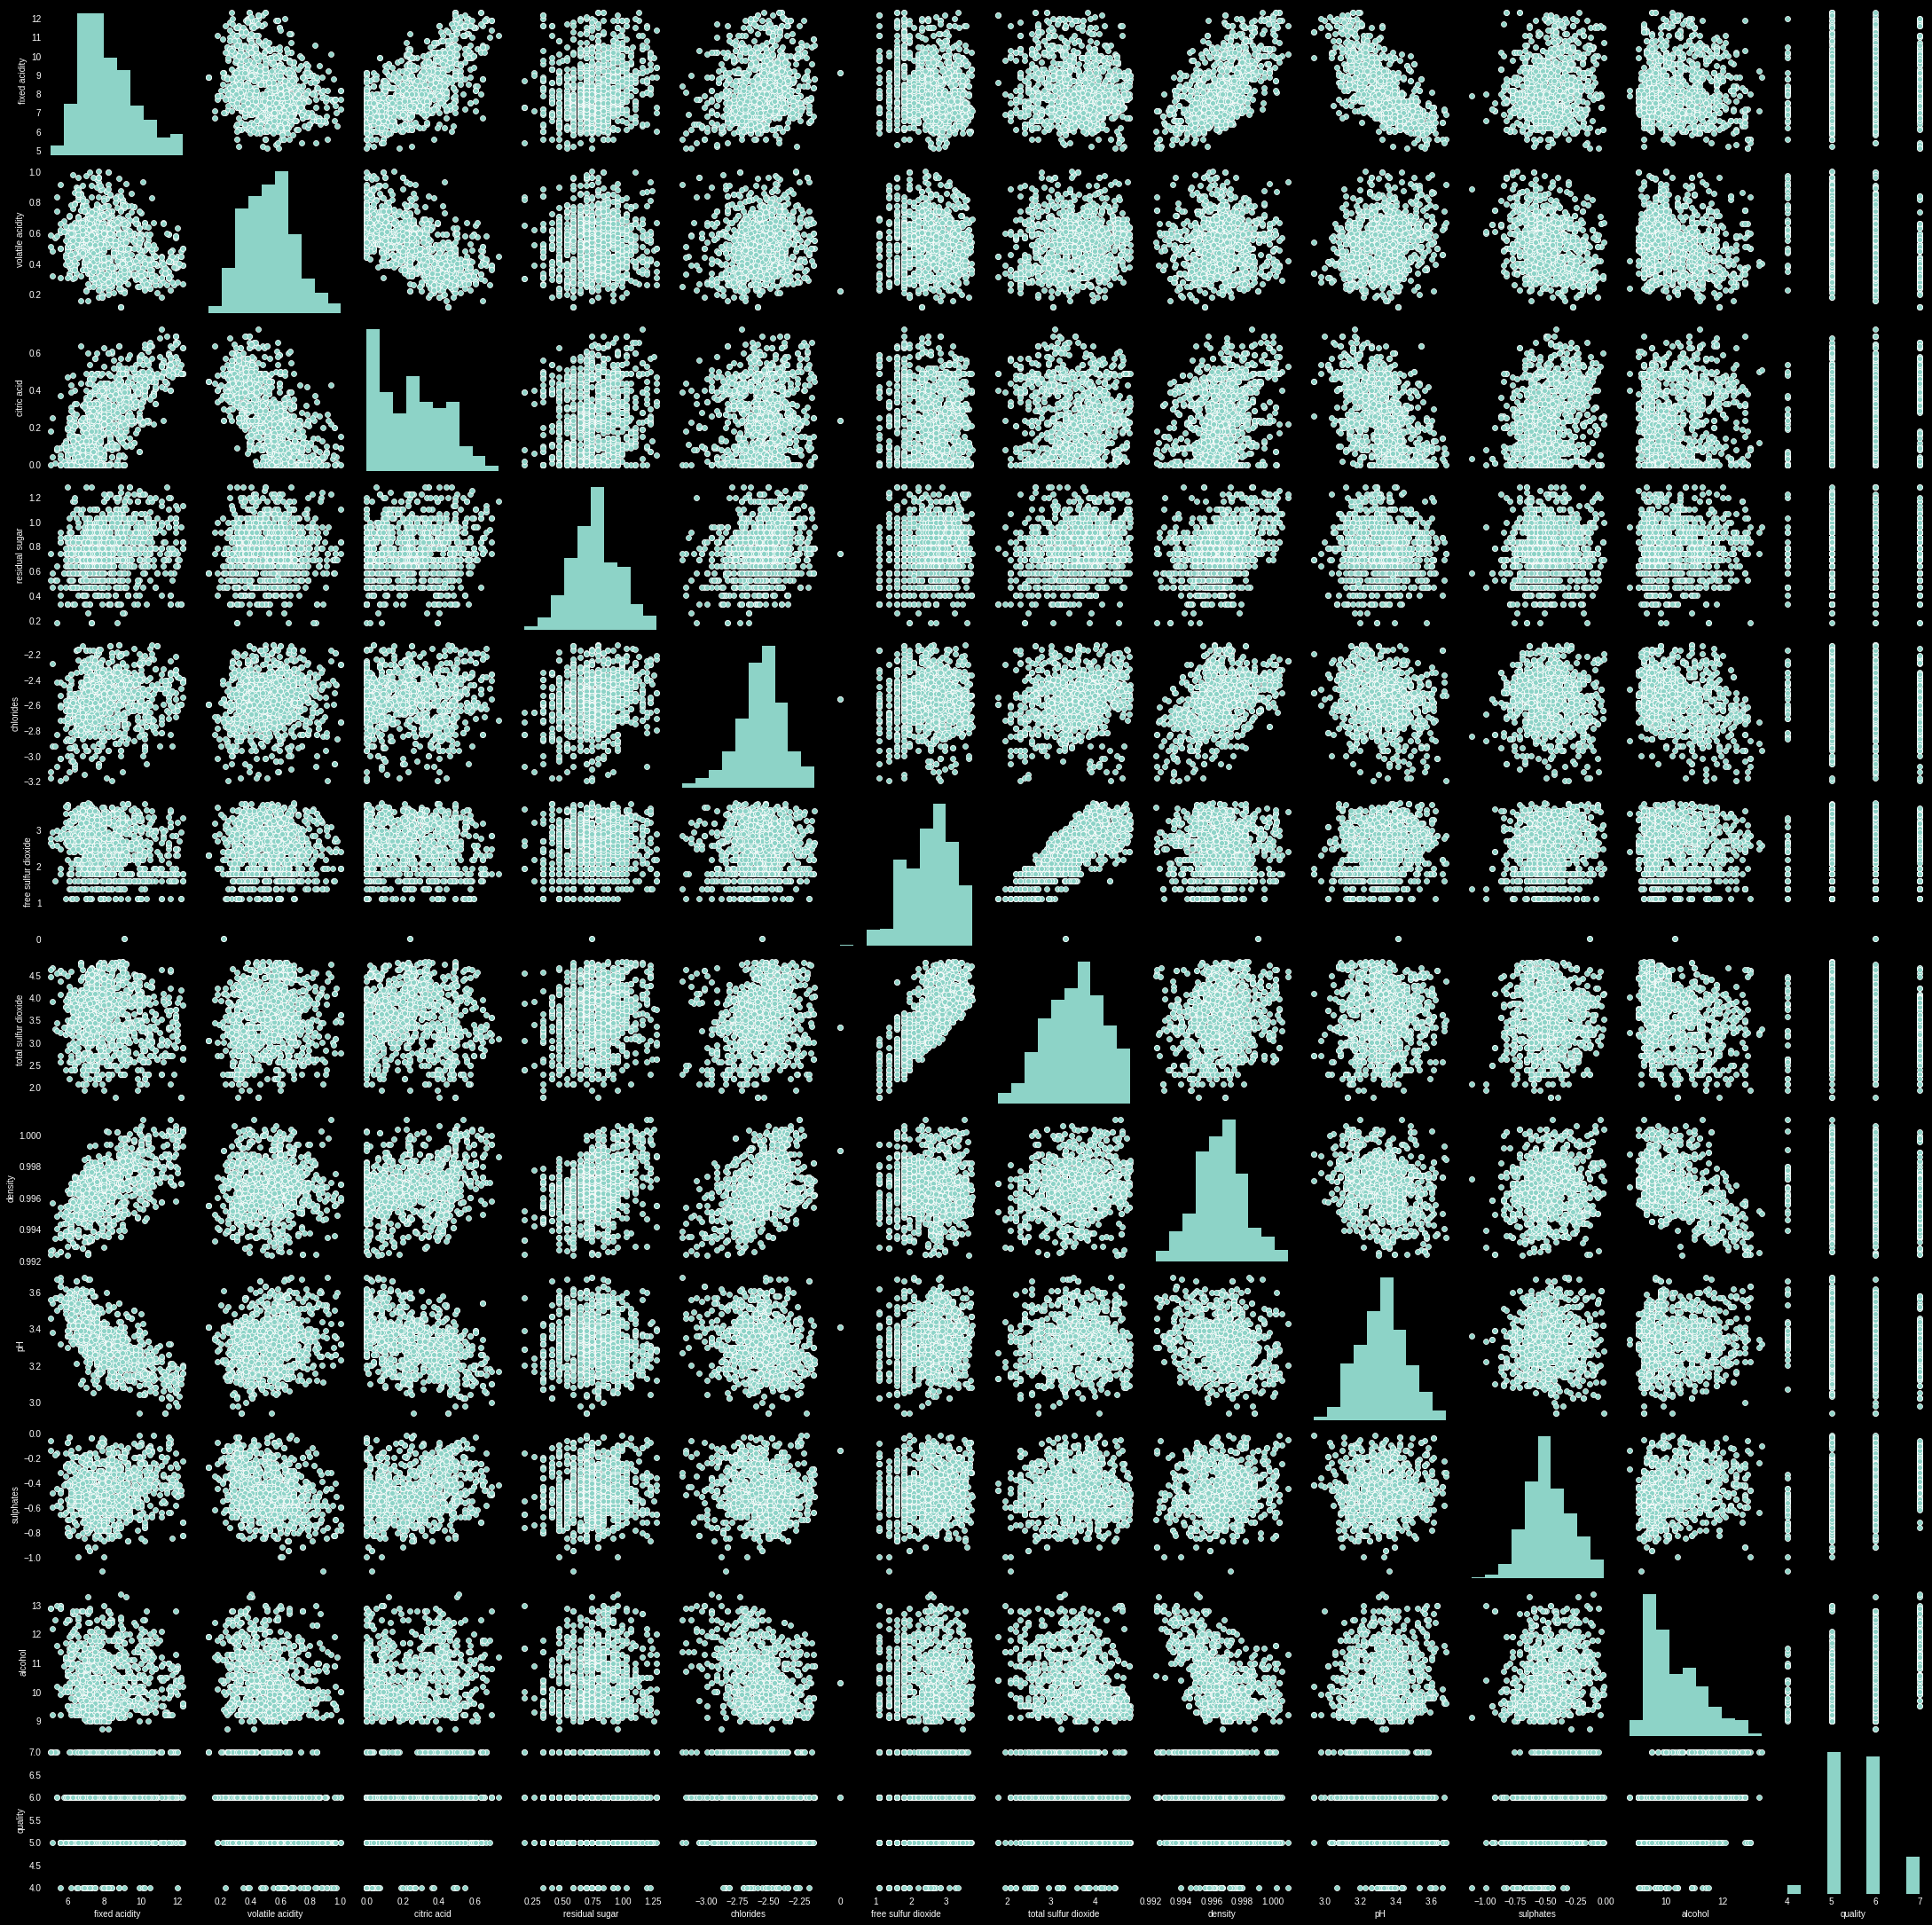

In [49]:
# Let's plot the pairplot of the cleaned dataframe
sns.pairplot(df_cleaned)

* This look way better than the pair plot of the raw data!

In [50]:
df_cleaned.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1179.000000       1179.000000  ...  1179.000000  1179.000000
mean        8.162002          0.523066  ...    10.350792     5.623410
std         1.458270          0.164231  ...     0.963954     0.721248
min         5.100000          0.120000  ...     8.700000     4.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.800000          0.520000  ...    10.100000     6.000000
75%         9.000000          0.630000  ...    11.000000     6.000000
max        12.300000          1.005000  ...    13.400000     7.000000

[8 rows x 12 columns]

In [51]:
df.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

## Training the model

In [52]:
df_cleaned.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...  -0.579818      9.4        5
1            7.8              0.88         0.00  ...  -0.385662      9.8        5
2            7.8              0.76         0.04  ...  -0.430783      9.8        5
3           11.2              0.28         0.56  ...  -0.544727      9.8        6
4            7.4              0.70         0.00  ...  -0.579818      9.4        5

[5 rows x 12 columns]

#### X and Y Split

In [53]:
X = df_cleaned.drop('quality',1)
y = df_cleaned['quality']

In [54]:
# requirement of the scaling algo
y = np.expand_dims(y,1)

In [55]:
# shape
X.shape,y.shape

((1179, 11), (1179, 1))

### Train Test Split

In [56]:
# importing spliting dependency
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [57]:
# shape check
(X_train.shape,y_train.shape),(X_test.shape,y_test.shape)

(((789, 11), (789, 1)), ((390, 11), (390, 1)))

### Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

# fit the standard scalar to the training data and transform it and only transform the data to the test data and do never fit it
# fitting the scaling to the data may lead to failing of generalization of the model on the new train (overfitting).
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


#y_train = sc_y.fit_transform(y_train)
#y_test = sc_y.transform(y_test)


### Finding the best fitting algorithm

In [62]:
### Importing training dependencies
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import PassiveAggressiveRegressor

### Import resting dependencies
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

In [63]:
def train_n_score(input_model):
  """
  Input: model with parameters.
  Output: prediction on the test set followed by accuracy score of the model on the test set. 
  """

  model = input_model
  model.fit(X_train,y_train.ravel())

  y_preds = model.predict(X_test)
  
  score = model.score(X_test,y_test)

  return y_preds,score


In [64]:
# simple linear regresion
y_preds,score = train_n_score(LinearRegression())
lr_r2 = r2_score(y_test,y_preds)
lr_r2

0.3687714971959122

In [65]:
# svr
y_preds,score = train_n_score(SVR(kernel='linear'))
svr_r2 = r2_score(y_test,y_preds)

In [66]:
# random_forest
y_preds,score = train_n_score(RandomForestRegressor())
rf_r2 = r2_score(y_test,y_preds)

In [67]:
# gradient boosting
y_preds,score = train_n_score(GradientBoostingRegressor())
gb_r2 = r2_score(y_test,y_preds)

In [68]:
# passive agressive
y_preds,score = train_n_score(PassiveAggressiveRegressor(C=1000))
pass_ass_r2 = r2_score(y_test,y_preds)

In [69]:
# Lasso
y_preds,score = train_n_score(Lasso(alpha=0.1))
lasso_r2 = r2_score(y_test,y_preds)

In [70]:
# Elastic Net
y_preds,score = train_n_score(ElasticNet(alpha=0.1))
elas_r2 = r2_score(y_test,y_preds)


In [71]:
# AdaBoostRegressor
y_preds,score = train_n_score(AdaBoostRegressor())
ada_r2 = r2_score(y_test,y_preds)

In [72]:

from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

In [73]:
models = [LinearRegression(),SVR(),RandomForestRegressor(),GradientBoostingRegressor(),PassiveAggressiveRegressor(),Lasso(),ElasticNet(),AdaBoostRegressor()]
model_names = 'Linear_reg SVR Random_forest Gradient_boost Passive_Aggr Lasso ElasticNet Adaboost'.split()
r2 = []
mse = []
avg_cv = []

for model in models:

  y_preds,score = train_n_score(model)
  
  r2.append(r2_score(y_test,y_preds))
  mse.append(mean_squared_error(y_test,y_preds))
  avg_cv.append(np.mean(cross_val_score(model,X,y.ravel())))

pd.DataFrame(list(zip(model_names,mse,r2,avg_cv)),columns=['model','mse','R2_Score','Avg_CV'])

model       mse  R2_Score    Avg_CV
0      Linear_reg  0.329853  0.368771  0.329727
1             SVR  0.331450  0.365716  0.275690
2   Random_forest  0.308233  0.410145  0.271386
3  Gradient_boost  0.323245  0.381418  0.284313
4    Passive_Aggr  0.651979 -0.247670 -0.685283
5           Lasso  0.524064 -0.002883 -0.063893
6      ElasticNet  0.524064 -0.002883 -0.063893
7        Adaboost  0.346890  0.336170  0.269769

* Random Forest is giving us the best results

In [75]:
# best model
best_model = RandomForestRegressor()

best_model.fit(X_train,y_train.ravel())

rf_y_preds = best_model.predict(X_test)

best_r2 = r2_score(y_test,rf_y_preds)

best_r2

0.4089351543136095

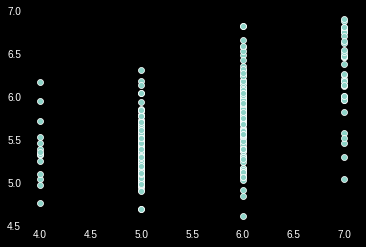

In [76]:
sns.scatterplot(y_test.ravel(),rf_y_preds)

In [102]:
errors_df = pd.DataFrame(list(zip(y_test.ravel(),y_preds.astype('int'),(y_test.ravel()-y_preds.astype('int')))),columns=['True','Predicted','Error Diff'])

In [103]:
errors_df

True  Predicted  Error Diff
0       5          5           0
1       5          5           0
2       7          6           1
3       6          6           0
4       5          5           0
..    ...        ...         ...
385     5          5           0
386     6          5           1
387     5          5           0
388     5          5           0
389     5          5           0

[390 rows x 3 columns]